In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime, timedelta
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from scipy.stats import chi2
from numpy import random
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [2]:
customers = pd.read_csv('customers.csv')

In [3]:
products = pd.read_csv('products.csv')

In [4]:
transactions = pd.read_csv('transactions.csv')

In [5]:
def assess_Nan(data):
    '''Returns a dataframe with total number of Na values and 
    the percntage of Nan values in each column
    the column names are noted on the index'''
    
    #pandas series denoting features and the sum of the their nul values
    null_sum = data.isnull().sum()
    
    #instantiat columns for missing data
    total = null_sum.sort_values(ascending = False)
    percent = (((null_sum/ len(data.index)) *100).round(2)).sort_values(ascending= False)
    
    #concatenate along the columns to create the complete dataframe
    df_NA = pd.concat([total, percent], axis = 1, keys = ['Number of NA', 'Percent NA'])
    
    df_NA = df_NA[(df_NA.T !=0).any()]
    return df_NA

In [6]:
#df_NA = assess_Nan(...)
#df_NA

# customers

In [7]:
customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [8]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [9]:
#ckeck the id_client 
cli_id = customers[['client_id']]
cli_id

,client_id
0,c_4410
1,c_7839
2,c_1699
3,c_5961
4,c_5320
...,...
8618,c_7920
8619,c_7403
8620,c_5119
8621,c_5643


In [10]:
cli_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
dtypes: object(1)
memory usage: 67.5+ KB


In [11]:

dupl_id = customers.duplicated(['client_id'], keep = False).sum()
dupl_id

0

In [12]:
customers.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

# products

In [13]:
products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [14]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [15]:
products.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [16]:
#check the price 
pric_zero = products[products['price']<=0]
pric_zero

,id_prod,price,categ
731,T_0,-1.0,0


In [17]:
#categ try to see if it is not a mistake and sope to think 
#what i notice it confirm my dission 
# data intry error .. 

In [18]:
s = products[['categ']]
s.isnull().sum()

categ    0
dtype: int64

In [19]:
products['categ'].unique()

array([0, 1, 2])

In [20]:
#map dataframe
#each client have diffrent transaction/ or bout diffrent products
#transactions

#date/ time factor is important / 
#the way the beahving from time to time / 
#analysis in particulare time 
# check if there is a relationship between columns in the tables 
#check the coherance 
#if thres is not negative price

#chifre 
#calculate the chifrre d'affrie  for each  month 
#to see the progress
#2 chiffre for each custmer ..

#costumers 
#products ..

#genral dataframe 
#clean the data for each table 
#primary 
#duplicates 
#data conssistance  
# prodct if there is price is biggger than zero 

# is there any bodies , if all price are greater than zero 
#see if there is a relationship between the columns 
#then make the join 
#what is prcentage of categ 1 and 0 and 2 
#chifre for each client .. then plot 

# the 50 most sold items  and to wich categroy they are belonging 


# transactions

In [21]:
transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [22]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [23]:
transactions.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

# Différents indicateurs et graphiques autour du chiffre d'affaires.

# merge dataframes 

In [24]:
cus_pro= pd.merge (products, transactions , how = 'outer', on =['id_prod'] )
cus_pro

,id_prod,price,categ,date,session_id,client_id
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389
1,0_1421,19.99,0.0,2022-11-19 03:42:20.707442,s_299590,c_8364
2,0_1421,19.99,0.0,2021-09-19 14:58:46.726179,s_92304,c_3544
3,0_1421,19.99,0.0,2023-01-11 16:04:24.367855,s_325369,c_1025
4,0_1421,19.99,0.0,2021-08-01 19:33:18.877168,s_70071,c_2298
...,...,...,...,...,...,...
679548,0_2245,NaN,NaN,2021-08-25 09:06:03.504061,s_80395,c_131
679549,0_2245,NaN,NaN,2022-03-06 19:59:19.462288,s_175311,c_4167
679550,0_2245,NaN,NaN,2022-05-16 11:35:20.319501,s_209381,c_4453
679551,0_2245,NaN,NaN,2022-02-11 09:05:43.952857,s_163405,c_1098


In [25]:
asses_na = assess_Nan(cus_pro) 
asses_na

,Number of NA,Percent NA
price,221,0.03
categ,221,0.03
date,21,0.00
session_id,21,0.00
client_id,21,0.00


In [26]:
cus_pro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679553 entries, 0 to 679552
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     679553 non-null  object 
 1   price       679332 non-null  float64
 2   categ       679332 non-null  float64
 3   date        679532 non-null  object 
 4   session_id  679532 non-null  object 
 5   client_id   679532 non-null  object 
dtypes: float64(2), object(4)
memory usage: 36.3+ MB


In [27]:
cus_pro.isnull().sum()

id_prod         0
price         221
categ         221
date           21
session_id     21
client_id      21
dtype: int64

In [28]:
cus_pro.duplicated().sum()

126

In [29]:
sec_merge= pd.merge (cus_pro, customers, how = 'outer', on =['client_id'])
sec_merge

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991.0
1,0_1421,19.99,0.0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991.0
2,0_2131,8.99,0.0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991.0
3,0_1635,16.99,0.0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991.0
4,0_166,1.83,0.0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991.0
...,...,...,...,...,...,...,...,...
679569,NaN,NaN,NaN,NaN,NaN,c_862,f,1956.0
679570,NaN,NaN,NaN,NaN,NaN,c_7584,f,1960.0
679571,NaN,NaN,NaN,NaN,NaN,c_90,m,2001.0
679572,NaN,NaN,NaN,NaN,NaN,c_587,m,1993.0


In [30]:
#Filtering/removing nan values 

In [31]:
sec_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679574 entries, 0 to 679573
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     679553 non-null  object 
 1   price       679332 non-null  float64
 2   categ       679332 non-null  float64
 3   date        679532 non-null  object 
 4   session_id  679532 non-null  object 
 5   client_id   679553 non-null  object 
 6   sex         679553 non-null  object 
 7   birth       679553 non-null  float64
dtypes: float64(3), object(5)
memory usage: 46.7+ MB


In [32]:
len(sec_merge)

679574

In [33]:
df_NA = assess_Nan(sec_merge)
df_NA 

,Number of NA,Percent NA
price,242,0.04
categ,242,0.04
date,42,0.01
session_id,42,0.01
id_prod,21,0.00
client_id,21,0.00
sex,21,0.00
birth,21,0.00


In [34]:
sec_merge.isnull().sum()

id_prod        21
price         242
categ         242
date           42
session_id     42
client_id      21
sex            21
birth          21
dtype: int64

In [35]:
pric_nozero = sec_merge[sec_merge['price']> 0]
pric_nozero

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991.0
1,0_1421,19.99,0.0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991.0
2,0_2131,8.99,0.0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991.0
3,0_1635,16.99,0.0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991.0
4,0_166,1.83,0.0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991.0
...,...,...,...,...,...,...,...,...
679548,2_163,68.99,2.0,2022-01-28 16:51:07.389515,s_156517,c_7739,m,1997.0
679549,2_101,63.99,2.0,2021-07-21 09:11:12.619736,s_65192,c_7089,m,2002.0
679550,2_101,63.99,2.0,2022-12-21 09:11:12.619736,s_315267,c_7089,m,2002.0
679551,2_101,63.99,2.0,2022-10-21 09:11:12.619736,s_285788,c_7089,m,2002.0


In [36]:
pric_nozero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679132 entries, 0 to 679552
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     679132 non-null  object 
 1   price       679132 non-null  float64
 2   categ       679132 non-null  float64
 3   date        679111 non-null  object 
 4   session_id  679111 non-null  object 
 5   client_id   679111 non-null  object 
 6   sex         679111 non-null  object 
 7   birth       679111 non-null  float64
dtypes: float64(3), object(5)
memory usage: 46.6+ MB


In [37]:
is_null  = pric_nozero.isnull().sum()
is_null

id_prod        0
price          0
categ          0
date          21
session_id    21
client_id     21
sex           21
birth         21
dtype: int64

In [38]:
nan_nul = pric_nozero[pric_nozero['date'].notnull()]
nan_nul

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991.0
1,0_1421,19.99,0.0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991.0
2,0_2131,8.99,0.0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991.0
3,0_1635,16.99,0.0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991.0
4,0_166,1.83,0.0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991.0
...,...,...,...,...,...,...,...,...
679548,2_163,68.99,2.0,2022-01-28 16:51:07.389515,s_156517,c_7739,m,1997.0
679549,2_101,63.99,2.0,2021-07-21 09:11:12.619736,s_65192,c_7089,m,2002.0
679550,2_101,63.99,2.0,2022-12-21 09:11:12.619736,s_315267,c_7089,m,2002.0
679551,2_101,63.99,2.0,2022-10-21 09:11:12.619736,s_285788,c_7089,m,2002.0


In [39]:
nan_nul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679111 entries, 0 to 679552
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     679111 non-null  object 
 1   price       679111 non-null  float64
 2   categ       679111 non-null  float64
 3   date        679111 non-null  object 
 4   session_id  679111 non-null  object 
 5   client_id   679111 non-null  object 
 6   sex         679111 non-null  object 
 7   birth       679111 non-null  float64
dtypes: float64(3), object(5)
memory usage: 46.6+ MB


In [40]:
nan_nul.isnull().sum()

id_prod       0
price         0
categ         0
date          0
session_id    0
client_id     0
sex           0
birth         0
dtype: int64

In [41]:
nan_nul.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991.0
1,0_1421,19.99,0.0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991.0
2,0_2131,8.99,0.0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991.0
3,0_1635,16.99,0.0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991.0
4,0_166,1.83,0.0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991.0


In [42]:
timefmt = "%Y-%m-%d %H:%M:%S.%f" 
nan_nul['date'] = pd.to_datetime(nan_nul['date'], format = timefmt, errors = 'coerce')
new_df = nan_nul
new_df

/var/folders/60/5b9_rz6d6qn1yvxznrxvrtxm0000gn/T/ipykernel_23285/2327949252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nan_nul['date'] = pd.to_datetime(nan_nul['date'], format = timefmt, errors = 'coerce')


,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991.0
1,0_1421,19.99,0.0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991.0
2,0_2131,8.99,0.0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991.0
3,0_1635,16.99,0.0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991.0
4,0_166,1.83,0.0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991.0
...,...,...,...,...,...,...,...,...
679548,2_163,68.99,2.0,2022-01-28 16:51:07.389515,s_156517,c_7739,m,1997.0
679549,2_101,63.99,2.0,2021-07-21 09:11:12.619736,s_65192,c_7089,m,2002.0
679550,2_101,63.99,2.0,2022-12-21 09:11:12.619736,s_315267,c_7089,m,2002.0
679551,2_101,63.99,2.0,2022-10-21 09:11:12.619736,s_285788,c_7089,m,2002.0


In [43]:
new_df['date'] = new_df['date'].dt.date

/var/folders/60/5b9_rz6d6qn1yvxznrxvrtxm0000gn/T/ipykernel_23285/2265263523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['date'] = new_df['date'].dt.date


In [44]:
dat_new_df = new_df
dat_new_df

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0.0,2022-02-20,s_168213,c_6389,f,1991.0
1,0_1421,19.99,0.0,2022-10-20,s_285450,c_6389,f,1991.0
2,0_2131,8.99,0.0,2021-10-09,s_102458,c_6389,f,1991.0
3,0_1635,16.99,0.0,2021-04-28,s_26841,c_6389,f,1991.0
4,0_166,1.83,0.0,2021-07-15,s_62585,c_6389,f,1991.0
...,...,...,...,...,...,...,...,...
679548,2_163,68.99,2.0,2022-01-28,s_156517,c_7739,m,1997.0
679549,2_101,63.99,2.0,2021-07-21,s_65192,c_7089,m,2002.0
679550,2_101,63.99,2.0,2022-12-21,s_315267,c_7089,m,2002.0
679551,2_101,63.99,2.0,2022-10-21,s_285788,c_7089,m,2002.0


In [45]:
dat_new_df.isnull().sum()

id_prod       0
price         0
categ         0
date          0
session_id    0
client_id     0
sex           0
birth         0
dtype: int64

# Calculate a set of summary statistics price

In [46]:
summray = dat_new_df['price'].describe()
summray['var'] = summray['std']**2
sumr = summray
sumr

count    679111.000000
mean         17.454773
std          18.328998
min           0.620000
25%           8.870000
50%          13.990000
75%          18.990000
max         300.000000
var         335.952150
Name: price, dtype: float64

In [47]:
# price by categ over tiem (month)

# Find the max and minmum date 

In [48]:
min(dat_new_df['date'])

datetime.date(2021, 3, 1)

In [49]:
max(dat_new_df['date'])

datetime.date(2023, 2, 28)

In [50]:
asc_data = dat_new_df.sort_values(by = 'date', ascending = True)
asc_data

,id_prod,price,categ,date,session_id,client_id,sex,birth
134359,1_449,14.99,1.0,2021-03-01,s_55,c_4810,f,1988.0
367938,1_406,24.81,1.0,2021-03-01,s_160,c_4466,m,1960.0
367949,1_376,17.49,1.0,2021-03-01,s_160,c_4466,m,1960.0
314768,2_142,105.24,2.0,2021-03-01,s_239,c_2494,m,2002.0
314742,1_400,16.60,1.0,2021-03-01,s_239,c_2494,m,2002.0
...,...,...,...,...,...,...,...,...
411439,0_1338,9.28,0.0,2023-02-28,s_348068,c_3286,m,1981.0
476167,1_245,23.99,1.0,2023-02-28,s_348220,c_2974,f,1956.0
476169,0_1560,12.12,0.0,2023-02-28,s_348220,c_2974,f,1956.0
593223,1_441,24.99,1.0,2023-02-28,s_348373,c_5990,f,1996.0


In [51]:
asc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679111 entries, 134359 to 315139
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     679111 non-null  object 
 1   price       679111 non-null  float64
 2   categ       679111 non-null  float64
 3   date        679111 non-null  object 
 4   session_id  679111 non-null  object 
 5   client_id   679111 non-null  object 
 6   sex         679111 non-null  object 
 7   birth       679111 non-null  float64
dtypes: float64(3), object(5)
memory usage: 46.6+ MB


In [52]:
timefmt = "%Y-%m-%d" 
asc_data['date'] = pd.to_datetime(nan_nul['date'], format = timefmt)
new_df_tim = asc_data
new_df_tim

,id_prod,price,categ,date,session_id,client_id,sex,birth
134359,1_449,14.99,1.0,2021-03-01,s_55,c_4810,f,1988.0
367938,1_406,24.81,1.0,2021-03-01,s_160,c_4466,m,1960.0
367949,1_376,17.49,1.0,2021-03-01,s_160,c_4466,m,1960.0
314768,2_142,105.24,2.0,2021-03-01,s_239,c_2494,m,2002.0
314742,1_400,16.60,1.0,2021-03-01,s_239,c_2494,m,2002.0
...,...,...,...,...,...,...,...,...
411439,0_1338,9.28,0.0,2023-02-28,s_348068,c_3286,m,1981.0
476167,1_245,23.99,1.0,2023-02-28,s_348220,c_2974,f,1956.0
476169,0_1560,12.12,0.0,2023-02-28,s_348220,c_2974,f,1956.0
593223,1_441,24.99,1.0,2023-02-28,s_348373,c_5990,f,1996.0


In [53]:
new_df_tim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679111 entries, 134359 to 315139
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679111 non-null  object        
 1   price       679111 non-null  float64       
 2   categ       679111 non-null  float64       
 3   date        679111 non-null  datetime64[ns]
 4   session_id  679111 non-null  object        
 5   client_id   679111 non-null  object        
 6   sex         679111 non-null  object        
 7   birth       679111 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 46.6+ MB


In [68]:
plot_dat = asc_data[['price', 'date']]
plot_dat

,price,date
134359,14.99,2021-03-01
367938,24.81,2021-03-01
367949,17.49,2021-03-01
314768,105.24,2021-03-01
314742,16.60,2021-03-01
...,...,...
411439,9.28,2023-02-28
476167,23.99,2023-02-28
476169,12.12,2023-02-28
593223,24.99,2023-02-28


In [69]:
plot_dat['date'] = plot_dat['date'].dt.strftime("%Y-%m")

df_plot_dat = plot_dat
df_plot_dat

/var/folders/60/5b9_rz6d6qn1yvxznrxvrtxm0000gn/T/ipykernel_23285/2864615349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_dat['date'] = plot_dat['date'].dt.strftime("%Y-%m")


,price,date
134359,14.99,2021-03
367938,24.81,2021-03
367949,17.49,2021-03
314768,105.24,2021-03
314742,16.60,2021-03
...,...,...
411439,9.28,2023-02
476167,23.99,2023-02
476169,12.12,2023-02
593223,24.99,2023-02


In [70]:
df_plot_dat['date'].unique()

array(['2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08',
       '2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02',
       '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08',
       '2022-09', '2022-10', '2022-11', '2022-12', '2023-01', '2023-02'],
      dtype=object)

In [71]:
df_plot_dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679111 entries, 134359 to 315139
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   price   679111 non-null  float64
 1   date    679111 non-null  object 
dtypes: float64(1), object(1)
memory usage: 15.5+ MB


In [72]:
df_plot_dat.isnull().sum()

price    0
date     0
dtype: int64

# work with data and time :

In [73]:
# slice for each year from first month to last month 

#year_21_ = df_plot_dat[df_plot_dat['date']== ]

pric_years = df_plot_dat.groupby(['date']).agg({'price': "sum"})
pric_years

,price
date,
2021-03,482440.61
2021-04,476109.30
2021-05,492943.47
2021-06,484088.56
2021-07,482835.40
2021-08,482284.79
2021-09,507240.68
2021-10,320798.74
2021-11,516167.73


In [74]:
set_ind = pric_years.reset_index('date')
set_ind

,date,price
0,2021-03,482440.61
1,2021-04,476109.30
2,2021-05,492943.47
3,2021-06,484088.56
4,2021-07,482835.40
5,2021-08,482284.79
6,2021-09,507240.68
7,2021-10,320798.74
8,2021-11,516167.73
9,2021-12,525917.28


In [75]:
set_ind['date'] = pd.to_datetime(set_ind['date'], errors='coerce')
date_time = set_ind
date_time

,date,price
0,2021-03-01,482440.61
1,2021-04-01,476109.30
2,2021-05-01,492943.47
3,2021-06-01,484088.56
4,2021-07-01,482835.40
5,2021-08-01,482284.79
6,2021-09-01,507240.68
7,2021-10-01,320798.74
8,2021-11-01,516167.73
9,2021-12-01,525917.28


In [76]:
date_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    24 non-null     datetime64[ns]
 1   price   24 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 512.0 bytes


In [77]:
in_21_22_df= date_time[ date_time["date"].isin(pd.date_range('2021-03-01', '2022-02-01'))]
in_21_22_df

,date,price
0,2021-03-01,482440.61
1,2021-04-01,476109.30
2,2021-05-01,492943.47
3,2021-06-01,484088.56
4,2021-07-01,482835.40
5,2021-08-01,482284.79
6,2021-09-01,507240.68
7,2021-10-01,320798.74
8,2021-11-01,516167.73
9,2021-12-01,525917.28


# Sales from march 2021 to februray 2022

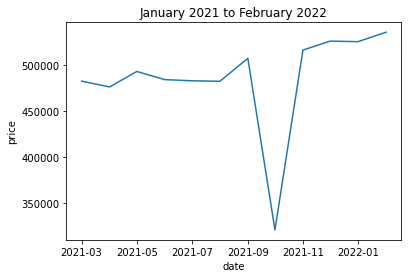

In [78]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('date')
ax1.set_ylabel('price')
ax1.set_title('January 2021 to February 2022')
ax1.plot('date', 'price', data = in_21_22_df)

# Salse from march 2022 to february 2023

In [79]:
in_22_23_df = date_time[date_time["date"].isin(pd.date_range('2022-03-01', '2023-02-01'))]
in_22_23_df


,date,price
12,2022-03-01,515456.53
13,2022-04-01,492998.94
14,2022-05-01,517132.60
15,2022-06-01,496016.12
16,2022-07-01,510783.12
17,2022-08-01,506467.27
18,2022-09-01,494114.53
19,2022-10-01,507917.77
20,2022-11-01,496664.94
21,2022-12-01,510219.50


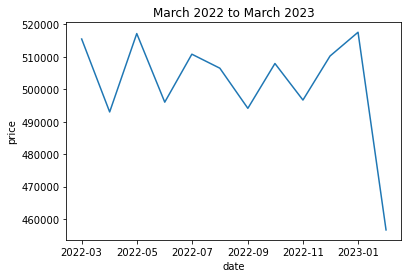

In [80]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('date')
ax1.set_ylabel('price')
ax1.set_title('March 2022 to March 2023')
ax1.plot('date', 'price', data = in_22_23_df)

In [81]:
#drop on the sales of the month of october .. 

#find why it is drop : ckeack  the sales for each categ for every day in that month  that has the lawest for
# every day in the month 

#  chaking the drop of sales in Month of OCT

In [82]:
new_df_tim

,id_prod,price,categ,date,session_id,client_id,sex,birth
134359,1_449,14.99,1.0,2021-03-01,s_55,c_4810,f,1988.0
367938,1_406,24.81,1.0,2021-03-01,s_160,c_4466,m,1960.0
367949,1_376,17.49,1.0,2021-03-01,s_160,c_4466,m,1960.0
314768,2_142,105.24,2.0,2021-03-01,s_239,c_2494,m,2002.0
314742,1_400,16.60,1.0,2021-03-01,s_239,c_2494,m,2002.0
...,...,...,...,...,...,...,...,...
411439,0_1338,9.28,0.0,2023-02-28,s_348068,c_3286,m,1981.0
476167,1_245,23.99,1.0,2023-02-28,s_348220,c_2974,f,1956.0
476169,0_1560,12.12,0.0,2023-02-28,s_348220,c_2974,f,1956.0
593223,1_441,24.99,1.0,2023-02-28,s_348373,c_5990,f,1996.0


In [83]:
new_df_tim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679111 entries, 134359 to 315139
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679111 non-null  object        
 1   price       679111 non-null  float64       
 2   categ       679111 non-null  float64       
 3   date        679111 non-null  datetime64[ns]
 4   session_id  679111 non-null  object        
 5   client_id   679111 non-null  object        
 6   sex         679111 non-null  object        
 7   birth       679111 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 46.6+ MB


# sles in the days of the month of october 

In [84]:
df_oct = new_df_tim[new_df_tim["date"].isin(pd.date_range('2021-10-01', '2021-10-31'))]
df_oct

,id_prod,price,categ,date,session_id,client_id,sex,birth
430095,1_611,16.99,1.0,2021-10-01,s_98314,c_233,m,2004.0
511583,0_1449,4.99,0.0,2021-10-01,s_98555,c_3877,f,1978.0
392556,0_1590,18.93,0.0,2021-10-01,s_98529,c_3209,f,1982.0
326567,1_708,23.06,1.0,2021-10-01,s_98382,c_3620,f,1979.0
113392,1_426,19.44,1.0,2021-10-01,s_98302,c_5772,m,1975.0
...,...,...,...,...,...,...,...,...
489171,0_1515,6.99,0.0,2021-10-31,s_112497,c_5270,m,1981.0
270531,0_804,19.19,0.0,2021-10-31,s_112506,c_5522,m,1974.0
83167,1_301,27.99,1.0,2021-10-31,s_112827,c_1991,m,1990.0
283805,0_1584,11.85,0.0,2021-10-31,s_112698,c_7364,f,1972.0


# The max/ min categegories sold in October 

In [85]:
asc_df3  = df_oct.sort_values(by = 'date', ascending = True)
asc_df3

,id_prod,price,categ,date,session_id,client_id,sex,birth
430095,1_611,16.99,1.0,2021-10-01,s_98314,c_233,m,2004.0
551674,0_1568,4.00,0.0,2021-10-01,s_98478,c_4014,m,1974.0
551660,0_687,17.99,0.0,2021-10-01,s_98478,c_4014,m,1974.0
88889,0_1223,5.99,0.0,2021-10-01,s_98274,c_7278,f,1973.0
133899,0_1126,11.78,0.0,2021-10-01,s_98192,c_2886,m,1970.0
...,...,...,...,...,...,...,...,...
659229,0_1636,9.45,0.0,2021-10-31,s_112503,c_770,f,1956.0
104517,0_1575,4.99,0.0,2021-10-31,s_112942,c_7946,f,1987.0
251637,2_140,42.48,2.0,2021-10-31,s_112545,c_7766,f,1992.0
114666,0_1357,15.99,0.0,2021-10-31,s_112710,c_161,f,1983.0


In [86]:
asc_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21599 entries, 430095 to 187870
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id_prod     21599 non-null  object        
 1   price       21599 non-null  float64       
 2   categ       21599 non-null  float64       
 3   date        21599 non-null  datetime64[ns]
 4   session_id  21599 non-null  object        
 5   client_id   21599 non-null  object        
 6   sex         21599 non-null  object        
 7   birth       21599 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 1.5+ MB


In [87]:
asc_df3.isnull().sum()

id_prod       0
price         0
categ         0
date          0
session_id    0
client_id     0
sex           0
birth         0
dtype: int64

In [88]:
asc_df3.loc[asc_df3['price'].idxmax()]

id_prod                     2_158
price                      247.22
categ                         2.0
date          2021-10-09 00:00:00
session_id               s_102233
client_id                  c_5662
sex                             f
birth                      1998.0
Name: 323939, dtype: object

In [89]:
asc_df3.loc[asc_df3['price'].idxmin()]

id_prod                     0_528
price                        0.62
categ                         0.0
date          2021-10-03 00:00:00
session_id                s_99272
client_id                  c_6534
sex                             f
birth                      1999.0
Name: 660611, dtype: object

# invistigating the the lawist categ soled in ocoteber by 

# find if there is a values less or/ == 0.62 


In [90]:
less_than_0 = asc_df3[asc_df3['price'] <= 0.62]
less_than_0

,id_prod,price,categ,date,session_id,client_id,sex,birth
660611,0_528,0.62,0.0,2021-10-03,s_99272,c_6534,f,1999.0
142838,0_528,0.62,0.0,2021-10-14,s_104606,c_4951,m,1984.0
668694,0_528,0.62,0.0,2021-10-20,s_107417,c_5606,f,1959.0
145658,0_202,0.62,0.0,2021-10-21,s_107804,c_2276,f,1978.0


# salles for ech categ on oct 2021

In [91]:
chifr_oct = asc_df3.groupby(['price','categ'])
chifr_oct

In [92]:
for key,item in chifr_oct:
    a_group = chifr_oct.get_group(key)
    print(a_group, "\n")

       id_prod  price  categ       date session_id client_id sex   birth
660611   0_528   0.62    0.0 2021-10-03    s_99272    c_6534   f  1999.0
142838   0_528   0.62    0.0 2021-10-14   s_104606    c_4951   m  1984.0
668694   0_528   0.62    0.0 2021-10-20   s_107417    c_5606   f  1959.0
145658   0_202   0.62    0.0 2021-10-21   s_107804    c_2276   f  1978.0 

       id_prod  price  categ       date session_id client_id sex   birth
194218   0_120   0.66    0.0 2021-10-19   s_107214    c_5822   m  1972.0 

       id_prod  price  categ       date session_id client_id sex   birth
154324  0_1552   0.98    0.0 2021-10-03    s_99241    c_4455   f  1984.0 

       id_prod  price  categ       date session_id client_id sex   birth
120285  0_1459   0.99    0.0 2021-10-01    s_98400    c_1716   f  1977.0
416849  0_1771   0.99    0.0 2021-10-10   s_102968    c_8074   m  1969.0
353222  0_1283   0.99    0.0 2021-10-14   s_104428    c_4653   m  1993.0
440165  0_2169   0.99    0.0 2021-10-16   s_1

       id_prod  price  categ       date session_id client_id sex   birth
258262   0_140   3.09    0.0 2021-10-02    s_99012    c_1250   f  1979.0
396815  0_1874   3.09    0.0 2021-10-13   s_103950     c_359   f  1988.0 

       id_prod  price  categ       date session_id client_id sex   birth
445151   0_502   3.13    0.0 2021-10-09   s_102303    c_3239   f  1984.0
531381   0_502   3.13    0.0 2021-10-31   s_112803    c_8012   m  1943.0 

       id_prod  price  categ       date session_id client_id sex   birth
154476  0_1980   3.15    0.0 2021-10-10   s_102990    c_4089   f  1983.0
434288  0_1980   3.15    0.0 2021-10-10   s_102594    c_2812   f  1980.0
570542  0_1980   3.15    0.0 2021-10-11   s_103390    c_2572   f  1978.0
323163  0_1980   3.15    0.0 2021-10-15   s_105150    c_7305   m  1972.0
189236  0_1980   3.15    0.0 2021-10-16   s_105703    c_8264   f  1990.0
276143  0_1980   3.15    0.0 2021-10-17   s_105999    c_2875   m  1974.0
571941  0_1980   3.15    0.0 2021-10-18   s_106

287259  0_1058   3.69    0.0 2021-10-31   s_112509    c_4043   f  1985.0 

       id_prod  price  categ       date session_id client_id sex   birth
586992   0_220   3.72    0.0 2021-10-01    s_98531    c_5121   m  1990.0
286120   0_220   3.72    0.0 2021-10-24   s_109508    c_4609   f  1990.0
542772   0_710   3.72    0.0 2021-10-24   s_109478     c_944   m  1979.0
89915    0_710   3.72    0.0 2021-10-25   s_109995    c_3858   f  1973.0
471750   0_220   3.72    0.0 2021-10-30   s_112134    c_2275   m  1977.0 

       id_prod  price  categ       date session_id client_id sex   birth
531053  0_1140   3.73    0.0 2021-10-01    s_98225    c_6252   m  1977.0
260559  0_1140   3.73    0.0 2021-10-02    s_98803    c_6851   m  1986.0
535350  0_1140   3.73    0.0 2021-10-02    s_98685    c_1944   f  1957.0
622421  0_1140   3.73    0.0 2021-10-05   s_100111    c_6875   m  1963.0
341072  0_1140   3.73    0.0 2021-10-06   s_100785    c_4217   f  1980.0
573951  0_1140   3.73    0.0 2021-10-07   s_101

474049   1_728   4.06    1.0 2021-10-30   s_112379    c_5815   f  1984.0 

       id_prod  price  categ       date session_id client_id sex   birth
143276  0_2132   4.07    0.0 2021-10-03    s_99335    c_1850   f  1983.0
293689  0_2132   4.07    0.0 2021-10-06   s_101009    c_1086   m  1981.0
411747  0_2132   4.07    0.0 2021-10-09   s_102331    c_8229   f  1953.0
488031  0_2132   4.07    0.0 2021-10-14   s_104469    c_3300   f  1984.0
227579  0_2132   4.07    0.0 2021-10-18   s_106467    c_2164   f  1972.0
253586  0_2132   4.07    0.0 2021-10-29   s_111645    c_7703   m  1960.0
173493  0_2132   4.07    0.0 2021-10-31   s_112541    c_1495   m  1945.0 

       id_prod  price  categ       date session_id client_id sex   birth
303558   0_738   4.08    0.0 2021-10-09   s_102396    c_4268   f  1982.0
657359   0_332   4.08    0.0 2021-10-11   s_103093    c_6793   f  1948.0 

       id_prod  price  categ       date session_id client_id sex   birth
20285   0_1184    4.1    0.0 2021-10-02    s_

530317  0_1710   4.53    0.0 2021-10-29   s_111910    c_4614   m  1965.0 

       id_prod  price  categ       date session_id client_id sex   birth
133805  0_1766   4.55    0.0 2021-10-05   s_100429    c_3519   m  1974.0
209805  0_1766   4.55    0.0 2021-10-13   s_104314    c_7245   f  1983.0
485107  0_1766   4.55    0.0 2021-10-16   s_105375    c_5019   f  1977.0
207218  0_1766   4.55    0.0 2021-10-21   s_107982    c_5520   f  1983.0 

       id_prod  price  categ       date session_id client_id sex   birth
595852  0_2216   4.56    0.0 2021-10-05   s_100231    c_5119   m  1974.0
89053   0_2216   4.56    0.0 2021-10-29   s_111729    c_4737   f  1982.0 

       id_prod  price  categ       date session_id client_id sex   birth
623468  0_1064   4.57    0.0 2021-10-08   s_101718    c_6468   m  1942.0
20520   0_1064   4.57    0.0 2021-10-15   s_105165    c_1609   m  1980.0
335932  0_1064   4.57    0.0 2021-10-15   s_105075    c_8400   m  1975.0
400191  0_1064   4.57    0.0 2021-10-16   s_1

611419  0_1994   4.98    0.0 2021-10-30   s_112209    c_3723   m  1991.0 

       id_prod  price  categ       date session_id client_id sex   birth
224375  0_1637   4.99    0.0 2021-10-01    s_98433    c_7465   f  1976.0
228004  0_1483   4.99    0.0 2021-10-01    s_98244    c_3337   m  1949.0
330360  0_1405   4.99    0.0 2021-10-01    s_98174    c_5277   m  1976.0
129306  0_1467   4.99    0.0 2021-10-01    s_98299    c_2722   m  1986.0
302650  0_1585   4.99    0.0 2021-10-01    s_98641    c_5289   f  1976.0
...        ...    ...    ...        ...        ...       ...  ..     ...
104205   0_761   4.99    0.0 2021-10-31   s_112894    c_6530   m  1991.0
82313   0_1449   4.99    0.0 2021-10-31   s_112706    c_2146   f  1970.0
221210  0_1859   4.99    0.0 2021-10-31   s_112694    c_1930   m  1981.0
315411  0_1409   4.99    0.0 2021-10-31   s_112754    c_7949   m  1975.0
104517  0_1575   4.99    0.0 2021-10-31   s_112942    c_7946   f  1987.0

[884 rows x 8 columns] 

       id_prod  price  

90402   0_1356   5.57    0.0 2021-10-31   s_112740    c_8547   f  1977.0 

       id_prod  price  categ       date session_id client_id sex   birth
113328    0_46   5.58    0.0 2021-10-02    s_99123    c_5772   m  1975.0
390480    0_46   5.58    0.0 2021-10-13   s_103987    c_5978   m  1986.0
285994    0_46   5.58    0.0 2021-10-21   s_108090    c_5056   f  1991.0
434747    0_46   5.58    0.0 2021-10-27   s_110891    c_6343   f  1982.0 

       id_prod  price  categ       date session_id client_id sex   birth
122309   0_272    5.6    0.0 2021-10-26   s_110278    c_1782   f  1988.0 

       id_prod  price  categ       date session_id client_id sex   birth
322291  0_1440   5.62    0.0 2021-10-02    s_98809    c_2978   f  1977.0
17678   0_1440   5.62    0.0 2021-10-02    s_98859    c_1609   m  1980.0
17729   0_1440   5.62    0.0 2021-10-02    s_98860    c_1609   m  1980.0
334196  0_1440   5.62    0.0 2021-10-03    s_99485    c_4953   m  1979.0
88910   0_1440   5.62    0.0 2021-10-03    s_

       id_prod  price  categ       date session_id client_id sex   birth
192237  0_1212   6.31    0.0 2021-10-01    s_98439    c_1544   f  1977.0
489727  0_1212   6.31    0.0 2021-10-05   s_100438    c_5594   f  1975.0
395604  0_1212   6.31    0.0 2021-10-06   s_100958    c_6584   m  1986.0
211659  0_1212   6.31    0.0 2021-10-06   s_100793    c_7943   f  1986.0
367632  0_1212   6.31    0.0 2021-10-07   s_101499    c_2582   m  1964.0
90845   0_1212   6.31    0.0 2021-10-08   s_101807     c_321   m  1973.0
37676   0_1212   6.31    0.0 2021-10-11   s_103020    c_6714   f  1968.0
582242  0_1212   6.31    0.0 2021-10-11   s_103266    c_4630   f  1981.0
281300  0_1212   6.31    0.0 2021-10-13   s_104027    c_2394   f  1976.0
69847   0_1212   6.31    0.0 2021-10-13   s_103977    c_8537   f  1991.0
539388  0_1212   6.31    0.0 2021-10-14   s_104648    c_3494   m  1976.0
405284  0_1212   6.31    0.0 2021-10-17   s_105972    c_4023   f  1978.0
441590  0_1212   6.31    0.0 2021-10-17   s_106114 

[73 rows x 8 columns] 

       id_prod  price  categ       date session_id client_id sex   birth
550749    0_26   6.86    0.0 2021-10-19   s_106883    c_4206   m  1963.0 

       id_prod  price  categ       date session_id client_id sex   birth
282817   0_826   6.89    0.0 2021-10-12   s_103461     c_654   f  1981.0 

       id_prod  price  categ       date session_id client_id sex   birth
13095    0_130    6.9    0.0 2021-10-10   s_102581    c_1609   m  1980.0
657386   0_130    6.9    0.0 2021-10-25   s_109948    c_5125   f  1956.0
395529   0_130    6.9    0.0 2021-10-30   s_112088    c_3947   f  1988.0 

       id_prod  price  categ       date session_id client_id sex   birth
204212    0_34   6.91    0.0 2021-10-22   s_108591    c_2920   m  1988.0 

       id_prod  price  categ       date session_id client_id sex   birth
179386  0_1078   6.92    0.0 2021-10-07   s_101483    c_2266   f  1987.0
67010   0_1078   6.92    0.0 2021-10-08   s_101548    c_1686   m  1971.0
550476  0_1078   6.

       id_prod  price  categ       date session_id client_id sex   birth
610560  0_1450   7.43    0.0 2021-10-01    s_98445    c_1840   m  1988.0
160547  0_1450   7.43    0.0 2021-10-02    s_99025    c_2010   m  1975.0
113933  0_1450   7.43    0.0 2021-10-02    s_98932     c_850   f  1957.0
384387  0_1450   7.43    0.0 2021-10-02    s_99055    c_7506   f  1979.0
605553  0_1450   7.43    0.0 2021-10-03    s_99470    c_5181   m  1962.0
372676  0_1450   7.43    0.0 2021-10-03    s_99225    c_7574   m  1986.0
624707  0_1450   7.43    0.0 2021-10-03    s_99491    c_1243   m  1983.0
568101  0_1450   7.43    0.0 2021-10-04    s_99892    c_4315   m  1949.0
354435  0_1450   7.43    0.0 2021-10-04    s_99814    c_5352   f  1978.0
429601  0_1450   7.43    0.0 2021-10-05   s_100585    c_4598   f  1992.0
200130  0_1450   7.43    0.0 2021-10-05   s_100435    c_4828   m  1995.0
538997  0_1450   7.43    0.0 2021-10-06   s_100798    c_5096   m  1990.0
112763  0_1450   7.43    0.0 2021-10-07   s_101171 

       id_prod  price  categ       date session_id client_id sex   birth
613709  0_1054   8.11    0.0 2021-10-01    s_98432    c_4410   f  1967.0
117791  0_1054   8.11    0.0 2021-10-02    s_99049    c_5301   m  1986.0
317524  0_1054   8.11    0.0 2021-10-02    s_98957    c_2748   f  1977.0
105792  0_1054   8.11    0.0 2021-10-02    s_99036    c_4263   f  1983.0
416825  0_1054   8.11    0.0 2021-10-09   s_102364    c_8074   m  1969.0
665375  0_1054   8.11    0.0 2021-10-09   s_102432    c_6121   m  1960.0
378203  0_1054   8.11    0.0 2021-10-14   s_104812    c_4079   f  1978.0
231832  0_1054   8.11    0.0 2021-10-14   s_104564     c_880   m  1991.0
435188  0_1054   8.11    0.0 2021-10-16   s_105617    c_4830   f  1974.0
457350  0_1054   8.11    0.0 2021-10-17   s_106131    c_4307   f  1982.0
13241   0_1054   8.11    0.0 2021-10-17   s_105960    c_1609   m  1980.0
331332  0_1054   8.11    0.0 2021-10-22   s_108415    c_6478   f  1958.0
419093  0_1054   8.11    0.0 2021-10-25   s_109978 

62273   0_1894   8.77    0.0 2021-10-27   s_110989    c_3454   m  1969.0 

       id_prod  price  categ       date session_id client_id sex   birth
103535  0_1666   8.78    0.0 2021-10-03    s_99231    c_6906   m  1986.0
292170  0_1666   8.78    0.0 2021-10-08   s_101823       c_8   m  1975.0
114594  0_1666   8.78    0.0 2021-10-12   s_103573     c_161   f  1983.0
427109  0_1666   8.78    0.0 2021-10-15   s_104944    c_4785   f  1970.0
192930  0_1666   8.78    0.0 2021-10-16   s_105567    c_8592   f  1974.0 

       id_prod  price  categ       date session_id client_id sex   birth
531050  0_1792   8.79    0.0 2021-10-01    s_98225    c_6252   m  1977.0
559949  0_1792   8.79    0.0 2021-10-03    s_99384    c_6707   f  1962.0
553633  0_1792   8.79    0.0 2021-10-09   s_102382    c_7772   f  1974.0
115523  0_1792   8.79    0.0 2021-10-10   s_102935    c_2039   f  1982.0
510561  0_1792   8.79    0.0 2021-10-15   s_105154    c_8396   m  1986.0
526873  0_1792   8.79    0.0 2021-10-20   s_107

       id_prod  price  categ       date session_id client_id sex   birth
391377    0_14   9.41    0.0 2021-10-02    s_98936    c_7643   m  2004.0
391386   0_998   9.41    0.0 2021-10-02    s_98936    c_7643   m  2004.0
147382   0_998   9.41    0.0 2021-10-04    s_99671    c_8118   m  1984.0
255571   0_998   9.41    0.0 2021-10-06   s_100792    c_8313   f  1987.0
176531   0_998   9.41    0.0 2021-10-09   s_102238    c_6151   m  1983.0
123768   0_998   9.41    0.0 2021-10-10   s_102806    c_1734   f  1980.0
246415   0_998   9.41    0.0 2021-10-11   s_103178    c_5560   m  1986.0
91840    0_998   9.41    0.0 2021-10-12   s_103905    c_8456   f  1970.0
542      0_998   9.41    0.0 2021-10-15   s_104869    c_1025   m  1984.0
540142   0_998   9.41    0.0 2021-10-17   s_106283    c_7455   m  1989.0
670263   0_998   9.41    0.0 2021-10-20   s_107460    c_5035   m  1958.0
8870     0_998   9.41    0.0 2021-10-20   s_107714    c_1609   m  1980.0
348723   0_998   9.41    0.0 2021-10-22   s_108432 

       id_prod  price  categ       date session_id client_id sex   birth
327800  0_1474   9.88    0.0 2021-10-01    s_98473    c_7634   m  1980.0
12224   0_1474   9.88    0.0 2021-10-01    s_98185    c_1609   m  1980.0
212197  0_1474   9.88    0.0 2021-10-02    s_98786    c_7235   f  1975.0
423010  0_1474   9.88    0.0 2021-10-02    s_98912    c_1327   f  1949.0
89164   0_1474   9.88    0.0 2021-10-02    s_98855    c_7009   m  1984.0
256260  0_1474   9.88    0.0 2021-10-02    s_98995    c_3191   f  1984.0
12208   0_1474   9.88    0.0 2021-10-02    s_98901    c_1609   m  1980.0
278867  0_1474   9.88    0.0 2021-10-03    s_99253    c_7722   m  1955.0
375014  0_1474   9.88    0.0 2021-10-03    s_99159    c_5196   m  1976.0
29910   0_1474   9.88    0.0 2021-10-03    s_99185     c_536   m  1987.0
187130  0_1474   9.88    0.0 2021-10-04   s_100043    c_4635   m  1988.0
99589   0_1474   9.88    0.0 2021-10-04    s_99688    c_1811   f  1991.0
261773  0_1474   9.88    0.0 2021-10-05   s_100174 

458597  0_1330  10.44    0.0 2021-10-31   s_112623    c_6101   f  1989.0 

       id_prod  price  categ       date session_id client_id sex   birth
42346   0_1896  10.45    0.0 2021-10-06   s_100864    c_6714   f  1968.0
75907   0_1896  10.45    0.0 2021-10-07   s_101359    c_7144   f  1984.0
399704  0_1896  10.45    0.0 2021-10-10   s_102570    c_5360   f  1986.0
120275  0_1896  10.45    0.0 2021-10-17   s_106204    c_1716   f  1977.0
137392  0_1896  10.45    0.0 2021-10-19   s_107186    c_4587   m  1975.0
622857  0_1896  10.45    0.0 2021-10-20   s_107458    c_7330   f  1976.0
339981  0_1896  10.45    0.0 2021-10-23   s_109082    c_1728   m  1975.0 

      id_prod  price  categ       date session_id client_id sex   birth
57611   0_952  10.47    0.0 2021-10-08   s_101537    c_3782   f  1990.0 

      id_prod  price  categ       date session_id client_id sex   birth
78565   0_194  10.56    0.0 2021-10-22   s_108581    c_7579   m  1977.0 

       id_prod  price  categ       date session

       id_prod  price  categ       date session_id client_id sex   birth
285428  0_1018  11.06    0.0 2021-10-03    s_99232    c_3703   m  1964.0
132674  0_1018  11.06    0.0 2021-10-04   s_100052    c_1037   m  1961.0
299673  0_1018  11.06    0.0 2021-10-05   s_100419    c_4238   m  1956.0
255621  0_1018  11.06    0.0 2021-10-06   s_100792    c_8313   f  1987.0
198943  0_1018  11.06    0.0 2021-10-07   s_101221    c_6360   f  1972.0
83559   0_1018  11.06    0.0 2021-10-08   s_101833    c_2130   m  1986.0
672807  0_1018  11.06    0.0 2021-10-10   s_102533    c_3420   m  1979.0
236150  0_1018  11.06    0.0 2021-10-10   s_102557    c_3124   m  1983.0
631231  0_1018  11.06    0.0 2021-10-10   s_102942    c_4076   m  1962.0
393411  0_1018  11.06    0.0 2021-10-11   s_103428    c_2312   f  1985.0
397920  0_1018  11.06    0.0 2021-10-17   s_105876      c_40   m  1989.0
29070   0_1018  11.06    0.0 2021-10-18   s_106714    c_1609   m  1980.0
86271   0_1018  11.06    0.0 2021-10-18   s_106816 

376427  0_1420  11.53    0.0 2021-10-31   s_112848    c_6536   m  1987.0 

       id_prod  price  categ       date session_id client_id sex   birth
183659  0_1774  11.54    0.0 2021-10-10   s_102831    c_4788   m  1984.0
48192   0_1774  11.54    0.0 2021-10-11   s_103383    c_1410   m  1988.0
254503  0_1774  11.54    0.0 2021-10-18   s_106473    c_8312   f  1971.0
581566  0_1774  11.54    0.0 2021-10-23   s_108927    c_6259   m  1991.0
112193  0_1774  11.54    0.0 2021-10-25   s_109916    c_8063   m  1962.0 

       id_prod  price  categ       date session_id client_id sex   birth
408887  0_1290  11.57    0.0 2021-10-03    s_99606    c_4765   m  1982.0
338409  0_1290  11.57    0.0 2021-10-09   s_102449    c_8254   f  1950.0
509933  0_1290  11.57    0.0 2021-10-10   s_102908    c_3867   f  1980.0
392023  0_1290  11.57    0.0 2021-10-11   s_103261    c_5892   m  1977.0
369518  0_1290  11.57    0.0 2021-10-19   s_106894    c_4623   m  1976.0
108362  0_1290  11.57    0.0 2021-10-19   s_107

389747   0_518   12.1    0.0 2021-10-18   s_106770    c_1958   f  1983.0 

       id_prod  price  categ       date session_id client_id sex   birth
511449  0_1560  12.12    0.0 2021-10-01    s_98323    c_7282   f  1980.0
155532  0_1560  12.12    0.0 2021-10-01    s_98307    c_2409   f  1978.0
603024  0_1560  12.12    0.0 2021-10-02    s_98781    c_3808   m  1957.0
183162  0_1560  12.12    0.0 2021-10-02    s_99062    c_5291   m  1973.0
404787  0_1560  12.12    0.0 2021-10-03    s_99562    c_8424   m  1983.0
438637  0_1560  12.12    0.0 2021-10-05   s_100232    c_8482   f  1971.0
382896  0_1560  12.12    0.0 2021-10-06   s_100814    c_3612   m  1988.0
41782   0_1560  12.12    0.0 2021-10-07   s_101083    c_6714   f  1968.0
227065  0_1560  12.12    0.0 2021-10-08   s_101583    c_5797   m  1983.0
19595   0_1560  12.12    0.0 2021-10-08   s_101912    c_1609   m  1980.0
311414  0_1560  12.12    0.0 2021-10-08   s_101917    c_1673   f  1988.0
427514  0_1560  12.12    0.0 2021-10-09   s_10242

531415  0_1586  12.71    0.0 2021-10-31   s_112803    c_8012   m  1943.0 

       id_prod  price  categ       date session_id client_id sex   birth
554503  0_2080  12.76    0.0 2021-10-01    s_98606    c_4266   m  1969.0
536118  0_2080  12.76    0.0 2021-10-03    s_99539    c_4914   f  1953.0
90017   0_2080  12.76    0.0 2021-10-10   s_102879    c_7925   f  1984.0
522672  0_2080  12.76    0.0 2021-10-10   s_102639    c_1680   m  1967.0
255685  0_2080  12.76    0.0 2021-10-11   s_103439    c_6303   m  1972.0
252052  0_2080  12.76    0.0 2021-10-12   s_103719    c_5030   f  1973.0
543001  0_2080  12.76    0.0 2021-10-12   s_103745    c_2552   m  1975.0
567032  0_2080  12.76    0.0 2021-10-13   s_104238    c_7670   f  1984.0
478194  0_2080  12.76    0.0 2021-10-15   s_105232    c_7406   m  1988.0
655590  0_2080  12.76    0.0 2021-10-18   s_106809    c_7149   f  1980.0
11701   0_2080  12.76    0.0 2021-10-20   s_107393    c_1609   m  1980.0
527747  0_2080  12.76    0.0 2021-10-20   s_10770

120767  0_2116  13.14    0.0 2021-10-30   s_112421    c_6700   m  1984.0 

       id_prod  price  categ       date session_id client_id sex   birth
26357   0_1386  13.16    0.0 2021-10-01    s_98185    c_1609   m  1980.0
455559  0_1386  13.16    0.0 2021-10-04    s_99821    c_7084   f  1976.0
175253  0_1386  13.16    0.0 2021-10-05   s_100454    c_4970   m  1978.0
241593  0_1386  13.16    0.0 2021-10-05   s_100557    c_7918   m  1987.0
301941  0_1386  13.16    0.0 2021-10-05   s_100457    c_5869   f  1952.0
450779  0_1386  13.16    0.0 2021-10-07   s_101384    c_1479   m  1990.0
649327  0_1386  13.16    0.0 2021-10-08   s_101760    c_8543   m  1999.0
577268  0_1386  13.16    0.0 2021-10-08   s_101960    c_4974   f  1972.0
512534  0_1386  13.16    0.0 2021-10-08   s_101610    c_6196   f  1987.0
26362   0_1386  13.16    0.0 2021-10-10   s_102520    c_1609   m  1980.0
446478  0_1386  13.16    0.0 2021-10-10   s_102828    c_4772   f  1971.0
563754  0_1386  13.16    0.0 2021-10-10   s_10282

503425  0_1452  13.77    0.0 2021-10-31   s_112676     c_404   m  1971.0 

       id_prod  price  categ       date session_id client_id sex   birth
158029  0_1090  13.78    0.0 2021-10-01    s_98480    c_8325   f  1983.0
427985  0_1090  13.78    0.0 2021-10-01    s_98327    c_2543   m  1952.0
195216  0_1090  13.78    0.0 2021-10-01    s_98207    c_1739   f  1964.0
671140  0_1090  13.78    0.0 2021-10-02    s_98870    c_4696   f  1982.0
146130  0_1090  13.78    0.0 2021-10-03    s_99342    c_3561   m  1991.0
119288  0_1090  13.78    0.0 2021-10-06   s_100837     c_117   f  1988.0
16291   0_1090  13.78    0.0 2021-10-09   s_102158    c_1609   m  1980.0
335320  0_1090  13.78    0.0 2021-10-13   s_103958     c_577   m  1929.0
177152  0_1090  13.78    0.0 2021-10-14   s_104755    c_7632   f  1975.0
479961  0_1090  13.78    0.0 2021-10-15   s_105108    c_3842   m  1976.0
173605  0_1090  13.78    0.0 2021-10-15   s_104939    c_2900   m  1979.0
345835  0_1090  13.78    0.0 2021-10-15   s_10508

531387  0_1384  14.44    0.0 2021-10-31   s_112803    c_8012   m  1943.0 

       id_prod  price  categ       date session_id client_id sex   birth
370437  0_1350  14.45    0.0 2021-10-01    s_98308    c_5859   f  1980.0
303645  0_1350  14.45    0.0 2021-10-01    s_98625    c_3351   m  1977.0
503     0_1350  14.45    0.0 2021-10-01    s_98383    c_3544   f  1967.0
361849  0_1350  14.45    0.0 2021-10-02    s_98958    c_7959   f  1974.0
82587   0_1350  14.45    0.0 2021-10-02    s_98702    c_7810   m  1978.0
422029  0_1350  14.45    0.0 2021-10-04    s_99980    c_4740   m  1978.0
301509  0_1350  14.45    0.0 2021-10-04    s_99912    c_1595   f  1973.0
403895  0_1350  14.45    0.0 2021-10-05   s_100183    c_8184   f  1976.0
78395   0_1350  14.45    0.0 2021-10-05   s_100371    c_3104   m  1985.0
152683  0_1350  14.45    0.0 2021-10-05   s_100334    c_4039   f  1976.0
124505  0_1350  14.45    0.0 2021-10-06   s_100871    c_3696   f  1974.0
73848   0_1350  14.45    0.0 2021-10-06   s_10071

601926     0_8  15.08    0.0 2021-10-11   s_103184    c_5465   m  1988.0 

       id_prod  price  categ       date session_id client_id sex   birth
253864   0_320  15.09    0.0 2021-10-17   s_105921    c_2569   f  1986.0
401152   0_320  15.09    0.0 2021-10-28   s_111165    c_4202   f  1987.0 

       id_prod  price  categ       date session_id client_id sex   birth
201795  0_2210   15.1    0.0 2021-10-01    s_98656    c_6007   f  1972.0
164499  0_2210   15.1    0.0 2021-10-01    s_98238    c_3181   m  1996.0
605548  0_2210   15.1    0.0 2021-10-06   s_100920    c_5181   m  1962.0
435845  0_2210   15.1    0.0 2021-10-07   s_101431    c_1310   f  1978.0
510359  0_2210   15.1    0.0 2021-10-09   s_102194    c_3742   f  1978.0
17470   0_2210   15.1    0.0 2021-10-14   s_104468    c_1609   m  1980.0
17475   0_2210   15.1    0.0 2021-10-18   s_106565    c_1609   m  1980.0
640998  0_2210   15.1    0.0 2021-10-20   s_107633    c_7543   m  1987.0
399144  0_2210   15.1    0.0 2021-10-22   s_108

256094  0_2008  15.97    0.0 2021-10-31   s_112579    c_2563   f  1975.0 

       id_prod  price  categ       date session_id client_id sex   birth
510544   0_576  15.98    0.0 2021-10-08   s_101683    c_5265   f  1957.0
27109    0_576  15.98    0.0 2021-10-13   s_103983    c_1609   m  1980.0
421187   0_576  15.98    0.0 2021-10-14   s_104641    c_1635   f  1988.0 

       id_prod  price  categ       date session_id client_id sex   birth
300289  0_1349  15.99    0.0 2021-10-01    s_98285     c_138   m  1972.0
88961   0_1357  15.99    0.0 2021-10-01    s_98504    c_7278   f  1973.0
24247   0_2165  15.99    0.0 2021-10-01    s_98270    c_1609   m  1980.0
436828  0_1403  15.99    0.0 2021-10-01    s_98399    c_6934   f  1977.0
233325  0_1569  15.99    0.0 2021-10-01    s_98571    c_5155   m  1999.0
...        ...    ...    ...        ...        ...       ...  ..     ...
271270  0_1403  15.99    0.0 2021-10-31   s_112616    c_2849   m  1989.0
140008  0_1321  15.99    0.0 2021-10-31   s_112

480894  0_2152  16.69    0.0 2021-10-27   s_111077    c_3768   m  1988.0 

       id_prod  price  categ       date session_id client_id sex   birth
228014   1_388   16.7    1.0 2021-10-01    s_98244    c_3337   m  1949.0
28561    1_388   16.7    1.0 2021-10-01    s_98279    c_1609   m  1980.0
392125   1_388   16.7    1.0 2021-10-28   s_111475    c_5892   m  1977.0
356893   1_388   16.7    1.0 2021-10-29   s_111581    c_8340   f  1977.0
416289   1_388   16.7    1.0 2021-10-29   s_111807    c_1754   m  1957.0
674334   1_388   16.7    1.0 2021-10-29   s_111547     c_743   f  1968.0
174715   1_388   16.7    1.0 2021-10-29   s_111674     c_430   f  1982.0
77653    1_388   16.7    1.0 2021-10-30   s_112347    c_3644   m  1991.0
156087   1_388   16.7    1.0 2021-10-30   s_112315     c_571   f  1984.0
659732   1_388   16.7    1.0 2021-10-31   s_112518    c_6779   m  1995.0
256149   1_388   16.7    1.0 2021-10-31   s_112579    c_2563   f  1975.0
104529   1_388   16.7    1.0 2021-10-31   s_11252

       id_prod  price  categ       date session_id client_id sex   birth
531056   1_622  17.41    1.0 2021-10-01    s_98225    c_6252   m  1977.0
676245   1_622  17.41    1.0 2021-10-01    s_98169    c_7614   m  1995.0
565112   1_622  17.41    1.0 2021-10-28   s_111156     c_854   m  1976.0
616520   1_622  17.41    1.0 2021-10-29   s_111561    c_7602   m  1954.0
268439   1_622  17.41    1.0 2021-10-29   s_111554    c_7945   m  1976.0
286311   1_622  17.41    1.0 2021-10-29   s_111550    c_7349   f  1947.0
401980   1_622  17.41    1.0 2021-10-30   s_112320    c_7394   f  1967.0 

       id_prod  price  categ       date session_id client_id sex   birth
429883  0_1108  17.45    0.0 2021-10-02    s_98880    c_3619   f  1940.0
198640  0_1108  17.45    0.0 2021-10-02    s_98945    c_3029   f  1977.0
413585  0_1108  17.45    0.0 2021-10-04    s_99896    c_5603   f  1974.0
403794  0_1108  17.45    0.0 2021-10-05   s_100183    c_8184   f  1976.0
477495  0_1108  17.45    0.0 2021-10-06   s_10107

252941    0_10  17.95    0.0 2021-10-29   s_112029    c_1457   m  1985.0 

       id_prod  price  categ       date session_id client_id sex   birth
551660   0_687  17.99    0.0 2021-10-01    s_98478    c_4014   m  1974.0
195654  0_1399  17.99    0.0 2021-10-01    s_98300    c_1006   m  1979.0
657294  0_1621  17.99    0.0 2021-10-01    s_98537    c_5975   m  1979.0
135903  0_1345  17.99    0.0 2021-10-01    s_98461    c_7276   m  1962.0
36452   0_1795  17.99    0.0 2021-10-01    s_98256    c_6714   f  1968.0
...        ...    ...    ...        ...        ...       ...  ..     ...
189873  0_1399  17.99    0.0 2021-10-31   s_112479     c_634   f  1979.0
531163  0_1621  17.99    0.0 2021-10-31   s_112714     c_757   m  1971.0
543677  0_1417  17.99    0.0 2021-10-31   s_112918     c_447   f  1982.0
612581   0_661  17.99    0.0 2021-10-31   s_112634    c_2848   m  1979.0
612572  0_1335  17.99    0.0 2021-10-31   s_112634    c_2848   m  1979.0

[434 rows x 8 columns] 

       id_prod  price  

210765  0_1772  18.48    0.0 2021-10-27   s_110651     c_383   m  1980.0 

       id_prod  price  categ       date session_id client_id sex   birth
70732   0_1700  18.49    0.0 2021-10-02    s_98903    c_3111   m  1981.0
481317  0_1700  18.49    0.0 2021-10-11   s_103030    c_3701   f  1979.0
218774  0_1700  18.49    0.0 2021-10-18   s_106398    c_7606   m  1970.0 

       id_prod  price  categ       date session_id client_id sex   birth
380704   1_570  18.49    1.0 2021-10-01    s_98450    c_4538   f  1965.0
95838    1_570  18.49    1.0 2021-10-31   s_112785    c_7714   f  1972.0 

       id_prod  price  categ       date session_id client_id sex   birth
494310  0_1042  18.53    0.0 2021-10-01    s_98248    c_2375   m  1974.0
354933  0_1042  18.53    0.0 2021-10-04    s_99722    c_7135   m  1996.0
117616  0_1042  18.53    0.0 2021-10-05   s_100560    c_3163   f  1972.0
645358  0_1042  18.53    0.0 2021-10-06   s_100696    c_8528   f  1973.0
25807   0_1042  18.53    0.0 2021-10-08   s_1

492810   1_278  19.18    1.0 2021-10-30   s_112198    c_8180   f  1974.0 

       id_prod  price  categ       date session_id client_id sex   birth
610955   0_804  19.19    0.0 2021-10-23   s_109195     c_977   f  1962.0
270531   0_804  19.19    0.0 2021-10-31   s_112506    c_5522   m  1974.0 

       id_prod  price  categ       date session_id client_id sex   birth
195667  0_1786   19.2    0.0 2021-10-01    s_98300    c_1006   m  1979.0
387433  0_1786   19.2    0.0 2021-10-10   s_102952    c_5675   m  1969.0
481596  0_1786   19.2    0.0 2021-10-15   s_104903     c_565   m  1979.0
426732  0_1786   19.2    0.0 2021-10-28   s_111191    c_1001   m  1982.0 

       id_prod  price  categ       date session_id client_id sex   birth
133518  0_2238  19.23    0.0 2021-10-04    s_99902    c_6336   m  1979.0
129067  0_2238  19.23    0.0 2021-10-10   s_102890    c_4443   m  1979.0
517647  0_2238  19.23    0.0 2021-10-13   s_104394    c_4214   m  1998.0
603816  0_2238  19.23    0.0 2021-10-15   s_1

17951  0_2036  20.49    0.0 2021-10-28   s_111282    c_1609   m  1980.0 

       id_prod  price  categ       date session_id client_id sex   birth
202712   0_252  20.54    0.0 2021-10-17   s_106271    c_7500   m  1987.0
17950    0_252  20.54    0.0 2021-10-24   s_109669    c_1609   m  1980.0 

      id_prod  price  categ       date session_id client_id sex   birth
69291  0_1886  20.56    0.0 2021-10-30   s_112378    c_5066   f  1990.0 

       id_prod  price  categ       date session_id client_id sex   birth
618789  0_2040  20.65    0.0 2021-10-28   s_111425     c_926   m  1939.0 

       id_prod  price  categ       date session_id client_id sex   birth
652202   1_250  20.76    1.0 2021-10-28   s_111265    c_2864   f  2002.0
645880   1_250  20.76    1.0 2021-10-30   s_112161     c_537   m  1984.0
432668   1_250  20.76    1.0 2021-10-30   s_112123    c_8469   f  1994.0
451105   1_250  20.76    1.0 2021-10-30   s_112203    c_8605   m  1979.0
37296    1_250  20.76    1.0 2021-10-30   s_11

231467   1_522  22.41    1.0 2021-10-29   s_111697    c_3899   m  1980.0 

       id_prod  price  categ       date session_id client_id sex   birth
459462   0_794  22.44    0.0 2021-10-06   s_101029    c_7479   f  1952.0
459590   0_794  22.44    0.0 2021-10-24   s_109603    c_6376   m  1995.0
157237   0_794  22.44    0.0 2021-10-28   s_111242    c_5654   m  1966.0 

       id_prod  price  categ       date session_id client_id sex   birth
167929    1_98  22.59    1.0 2021-10-01    s_98281    c_4958   m  1999.0 

       id_prod  price  categ       date session_id client_id sex   birth
340411   1_730  22.65    1.0 2021-10-01    s_98668    c_4812   m  1931.0
135088   1_730  22.65    1.0 2021-10-29   s_111623    c_2320   f  1986.0
637734   1_730  22.65    1.0 2021-10-31   s_112756    c_2335   f  1996.0
531402   1_730  22.65    1.0 2021-10-31   s_112803    c_8012   m  1943.0 

       id_prod  price  categ       date session_id client_id sex   birth
455374    0_42  22.68    0.0 2021-10-25   s

462974   0_410  25.23    0.0 2021-10-23   s_109088    c_1080   f  1969.0 

      id_prod  price  categ       date session_id client_id sex   birth
75992     0_4  25.33    0.0 2021-10-15   s_104943    c_7144   f  1984.0 

       id_prod  price  categ       date session_id client_id sex   birth
110901   1_712  25.48    1.0 2021-10-01    s_98414    c_4975   m  1982.0
617471   1_712  25.48    1.0 2021-10-31   s_112537    c_3007   f  1992.0 

       id_prod  price  categ       date session_id client_id sex   birth
350546    0_18  25.49    0.0 2021-10-28   s_111521    c_4544   f  1990.0 

       id_prod  price  categ       date session_id client_id sex   birth
61546    1_644  25.79    1.0 2021-10-29   s_111803    c_3454   m  1969.0
88663    1_644  25.79    1.0 2021-10-29   s_111985    c_3524   m  1981.0
484550   1_644  25.79    1.0 2021-10-30   s_112364    c_2291   f  1990.0
593654   1_644  25.79    1.0 2021-10-31   s_112790    c_2696   f  1978.0 

       id_prod  price  categ       date ses

18348    1_395  28.99    1.0 2021-10-31   s_112556    c_1609   m  1980.0 

       id_prod  price  categ       date session_id client_id sex   birth
652509   1_616  29.02    1.0 2021-10-01    s_98562     c_230   m  1997.0
456290   1_616  29.02    1.0 2021-10-28   s_111223    c_7978   f  1989.0
303388   1_616  29.02    1.0 2021-10-29   s_111897    c_2826   m  1986.0
311868   1_616  29.02    1.0 2021-10-31   s_112668    c_7854   m  1988.0 

       id_prod  price  categ       date session_id client_id sex   birth
71540    0_110  29.04    0.0 2021-10-23   s_108844    c_2446   f  1988.0
658657  0_1918  29.04    0.0 2021-10-27   s_110867    c_6787   m  1969.0 

       id_prod  price  categ       date session_id client_id sex   birth
249861   1_328  29.24    1.0 2021-10-31   s_112822    c_6833   f  1947.0 

       id_prod  price  categ       date session_id client_id sex   birth
186502    1_22  29.33    1.0 2021-10-30   s_112182    c_5444   m  1982.0 

       id_prod  price  categ       date s

38962   1_591  39.99    1.0 2021-10-31   s_112671    c_6714   f  1968.0 

       id_prod  price  categ       date session_id client_id sex   birth
251721   1_562   40.5    1.0 2021-10-01    s_98513    c_2377   f  1937.0 

       id_prod  price  categ       date session_id client_id sex   birth
570473   1_452   40.8    1.0 2021-10-28   s_111251    c_4805   f  1975.0 

       id_prod  price  categ       date session_id client_id sex   birth
501045   2_237  40.99    2.0 2021-10-05   s_100322    c_7965   f  2004.0
517546   2_237  40.99    2.0 2021-10-10   s_102852    c_3734   f  1996.0
533061   2_237  40.99    2.0 2021-10-16   s_105475    c_5007   f  2001.0
382051   2_237  40.99    2.0 2021-10-29   s_111948    c_5764   f  2003.0 

       id_prod  price  categ       date session_id client_id sex   birth
445295    2_46  41.31    2.0 2021-10-05   s_100112    c_1324   f  1999.0
269696    2_46  41.31    2.0 2021-10-06   s_100914      c_50   f  1994.0
503844    2_46  41.31    2.0 2021-10-07   s_

169969   2_109  53.99    2.0 2021-10-31   s_112684    c_4958   m  1999.0 

       id_prod  price  categ       date session_id client_id sex   birth
661786   2_208  54.87    2.0 2021-10-01    s_98282    c_5457   f  2004.0
622371   2_208  54.87    2.0 2021-10-01    s_98320    c_6915   m  1998.0
194472   2_208  54.87    2.0 2021-10-02    s_98894    c_4558   m  1945.0
549953   2_208  54.87    2.0 2021-10-02    s_98857     c_415   m  1993.0
596676   2_208  54.87    2.0 2021-10-06   s_100709    c_1564   f  2004.0
644499   2_208  54.87    2.0 2021-10-07   s_101395    c_5010   f  2004.0
589327   2_208  54.87    2.0 2021-10-09   s_102150    c_1808   m  2004.0
327754   2_208  54.87    2.0 2021-10-11   s_103426    c_6176   m  1999.0
314175   2_208  54.87    2.0 2021-10-16   s_105508    c_1751   f  2001.0
608422   2_208  54.87    2.0 2021-10-16   s_105720    c_1895   f  1999.0
171733   2_208  54.87    2.0 2021-10-16   s_105691    c_4958   m  1999.0
594146   2_208  54.87    2.0 2021-10-16   s_10575

       id_prod  price  categ       date session_id client_id sex   birth
37104    2_165  71.99    2.0 2021-10-07   s_101528    c_6714   f  1968.0
168103   2_165  71.99    2.0 2021-10-08   s_101561    c_4958   m  1999.0
425178   2_165  71.99    2.0 2021-10-10   s_102672    c_6540   m  2004.0
521042   2_165  71.99    2.0 2021-10-10   s_102515    c_1176   m  2001.0
598956   2_165  71.99    2.0 2021-10-16   s_105793     c_308   f  2004.0
636405   2_165  71.99    2.0 2021-10-18   s_106793    c_1834   f  1997.0
636398   2_165  71.99    2.0 2021-10-20   s_107682    c_4961   f  1992.0
609090   2_165  71.99    2.0 2021-10-27   s_110842    c_1653   m  2004.0
546661   2_165  71.99    2.0 2021-10-27   s_110699    c_2313   f  1995.0 

       id_prod  price  categ       date session_id client_id sex   birth
550496   2_216  72.01    2.0 2021-10-09   s_102220    c_5590   m  1984.0
419837   2_216  72.01    2.0 2021-10-24   s_109328    c_7562   m  1996.0
170638   2_216  72.01    2.0 2021-10-29   s_11192

452062   2_131  127.99    2.0 2021-10-08   s_101847    c_3939   m  1955.0 

       id_prod  price  categ       date session_id client_id sex   birth
443115   2_220  130.8    2.0 2021-10-27   s_110894    c_7971   m  2004.0 

      id_prod   price  categ       date session_id client_id sex   birth
43466    2_57  130.99    2.0 2021-10-24   s_109276    c_6714   f  1968.0 

       id_prod   price  categ       date session_id client_id sex   birth
678328   2_210  132.52    2.0 2021-10-15   s_105287    c_4279   m  1992.0 

       id_prod   price  categ       date session_id client_id sex   birth
317605   2_176  134.57    2.0 2021-10-26   s_110487    c_1907   m  1995.0 

       id_prod   price  categ       date session_id client_id sex   birth
495894   2_203  136.99    2.0 2021-10-10   s_102634    c_1046   m  2004.0 

       id_prod   price  categ       date session_id client_id sex   birth
432659   2_198  138.32    2.0 2021-10-08   s_101580    c_1946   m  1964.0
490691   2_198  138.32    2.0 

278956   2_158  247.22    2.0 2021-10-24   s_109551    c_4738   m  2001.0 



In [93]:
categ_0 = asc_df3[asc_df3['categ']== 2.0]
categ_0

,id_prod,price,categ,date,session_id,client_id,sex,birth
661780,2_159,145.99,2.0,2021-10-01,s_98282,c_5457,f,2004.0
661786,2_208,54.87,2.0,2021-10-01,s_98282,c_5457,f,2004.0
657273,2_211,203.99,2.0,2021-10-01,s_98537,c_5975,m,1979.0
643067,2_175,60.99,2.0,2021-10-01,s_98557,c_2672,f,2004.0
444570,2_202,67.57,2.0,2021-10-01,s_98481,c_6305,f,2002.0
...,...,...,...,...,...,...,...,...
636222,2_140,42.48,2.0,2021-10-31,s_112621,c_2018,m,1992.0
117026,2_162,102.82,2.0,2021-10-31,s_112758,c_5777,f,1998.0
598759,2_160,62.83,2.0,2021-10-31,s_112594,c_7494,f,1995.0
513706,2_139,82.99,2.0,2021-10-31,s_112777,c_2203,m,1997.0


In [94]:
categ_0 = asc_df3[asc_df3['categ']== 1.0]
categ_0

,id_prod,price,categ,date,session_id,client_id,sex,birth
430095,1_611,16.99,1.0,2021-10-01,s_98314,c_233,m,2004.0
449005,1_251,15.99,1.0,2021-10-01,s_98181,c_2083,f,1934.0
88955,1_498,23.37,1.0,2021-10-01,s_98274,c_7278,f,1973.0
553058,1_642,37.13,1.0,2021-10-01,s_98637,c_2840,f,1989.0
59640,1_364,10.30,1.0,2021-10-01,s_98313,c_6588,m,1963.0
...,...,...,...,...,...,...,...,...
31014,1_366,28.54,1.0,2021-10-31,s_112546,c_682,f,1974.0
525499,1_374,10.71,1.0,2021-10-31,s_112768,c_6919,f,1992.0
314443,1_305,29.99,1.0,2021-10-31,s_112781,c_3455,m,1964.0
87419,1_249,22.99,1.0,2021-10-31,s_112909,c_3977,f,1976.0


In [95]:
categ_0 = asc_df3[asc_df3['categ']== 0.0]
categ_0

,id_prod,price,categ,date,session_id,client_id,sex,birth
551674,0_1568,4.00,0.0,2021-10-01,s_98478,c_4014,m,1974.0
551660,0_687,17.99,0.0,2021-10-01,s_98478,c_4014,m,1974.0
88889,0_1223,5.99,0.0,2021-10-01,s_98274,c_7278,f,1973.0
133899,0_1126,11.78,0.0,2021-10-01,s_98192,c_2886,m,1970.0
88885,0_1430,16.47,0.0,2021-10-01,s_98504,c_7278,f,1973.0
...,...,...,...,...,...,...,...,...
204118,0_1397,14.99,0.0,2021-10-31,s_112514,c_2920,m,1988.0
659229,0_1636,9.45,0.0,2021-10-31,s_112503,c_770,f,1956.0
104517,0_1575,4.99,0.0,2021-10-31,s_112942,c_7946,f,1987.0
114666,0_1357,15.99,0.0,2021-10-31,s_112710,c_161,f,1983.0


In [96]:
sall_categ_oc =  asc_df3.groupby(['date','categ']).agg({'price' :'sum'})
sall_categ_oc

price
date       categ         
2021-10-01 0.0    6950.50
           1.0    7003.79
           2.0    3104.05
2021-10-02 0.0    7141.01
           2.0    2041.12
...                   ...
2021-10-30 1.0    6753.69
           2.0    2898.47
2021-10-31 0.0    5924.07
           1.0    7261.67
           2.0    3219.38

[67 rows x 1 columns]

# Removing the month of october from the analysis 

In [97]:
new_df = new_df_tim[~new_df_tim['date'].isin(pd.date_range('2021-10-01', '2021-10-31'))]
new_df

,id_prod,price,categ,date,session_id,client_id,sex,birth
134359,1_449,14.99,1.0,2021-03-01,s_55,c_4810,f,1988.0
367938,1_406,24.81,1.0,2021-03-01,s_160,c_4466,m,1960.0
367949,1_376,17.49,1.0,2021-03-01,s_160,c_4466,m,1960.0
314768,2_142,105.24,2.0,2021-03-01,s_239,c_2494,m,2002.0
314742,1_400,16.60,1.0,2021-03-01,s_239,c_2494,m,2002.0
...,...,...,...,...,...,...,...,...
411439,0_1338,9.28,0.0,2023-02-28,s_348068,c_3286,m,1981.0
476167,1_245,23.99,1.0,2023-02-28,s_348220,c_2974,f,1956.0
476169,0_1560,12.12,0.0,2023-02-28,s_348220,c_2974,f,1956.0
593223,1_441,24.99,1.0,2023-02-28,s_348373,c_5990,f,1996.0


# Tope clients that bought books in general 

In [98]:
top_clients = new_df_tim.groupby(['client_id', 'sex']).agg({'price': 'sum'})

set_idx_top = top_clients.reset_index('sex')
set_idx_top

,sex,price
client_id,,
c_1,m,558.18
c_10,m,1353.60
c_100,m,254.85
c_1000,f,2261.89
c_1001,m,1812.86
...,...,...
c_995,m,189.41
c_996,f,1625.58
c_997,f,1490.01


In [99]:
top_30= set_idx_top.nlargest(30,'price')
top_30

,sex,price
client_id,,
c_1609,m,324033.35
c_4958,m,289760.34
c_6714,f,153598.92
c_3454,m,113637.93
c_3263,f,5276.87
c_1570,f,5271.62
c_2899,f,5214.05
c_2140,f,5208.82
c_7319,f,5155.77


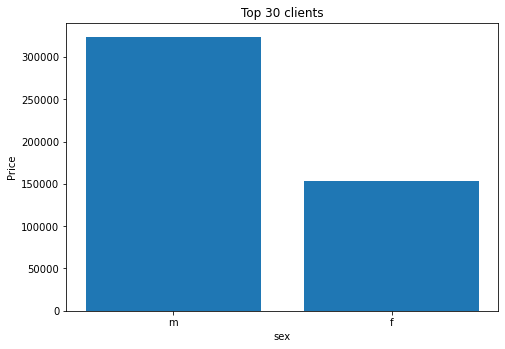

In [100]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
categ = top_30['sex']
price = top_30['price']
plt.ylabel('Price')
plt.xlabel('sex')
plt.title('Top 30 clients')
ax.bar(categ,price)
plt.show()

# defin outliers 


In [101]:
new_df

,id_prod,price,categ,date,session_id,client_id,sex,birth
134359,1_449,14.99,1.0,2021-03-01,s_55,c_4810,f,1988.0
367938,1_406,24.81,1.0,2021-03-01,s_160,c_4466,m,1960.0
367949,1_376,17.49,1.0,2021-03-01,s_160,c_4466,m,1960.0
314768,2_142,105.24,2.0,2021-03-01,s_239,c_2494,m,2002.0
314742,1_400,16.60,1.0,2021-03-01,s_239,c_2494,m,2002.0
...,...,...,...,...,...,...,...,...
411439,0_1338,9.28,0.0,2023-02-28,s_348068,c_3286,m,1981.0
476167,1_245,23.99,1.0,2023-02-28,s_348220,c_2974,f,1956.0
476169,0_1560,12.12,0.0,2023-02-28,s_348220,c_2974,f,1956.0
593223,1_441,24.99,1.0,2023-02-28,s_348373,c_5990,f,1996.0


In [102]:
def plot_boxplot(df, prx):
    plt.boxplot(df[prx])
    plt.xlabel('outlier values (Price of categories)')
    plt.grid(False)
    plt.show()

In [103]:
# outliers : 

# tope cusomers : 

# group by client id , sum price and ascaning way to see the top clients  and visualize them 
# 

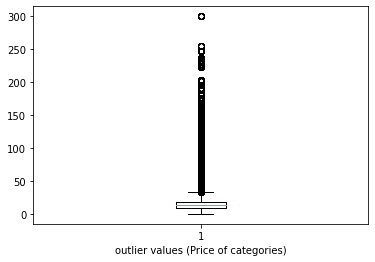

In [104]:
plot_boxplot(new_df, 'price')

In [105]:
outliers = []

def detect_outliers(price):
    threshold = 3
    mean = np.mean(price)
    std = np.std(price)
    
    for i in price:
        z_score = (i - mean)/std
        
        if np.abs(z_score)> threshold:
            outliers.append(i)
    return outliers

In [106]:
outlier_pt = detect_outliers(new_df['price'])
outlier_pt

[105.24,
 102.82,
 80.99,
 120.22,
 100.99,
 145.99,
 139.99,
 102.99,
 104.06,
 247.22,
 157.63,
 115.93,
 115.75,
 80.99,
 78.83,
 145.99,
 115.3,
 188.48,
 120.61,
 189.99,
 81.19,
 111.72,
 80.99,
 157.63,
 230.04,
 73.18,
 145.99,
 83.99,
 79.99,
 236.99,
 96.69,
 104.99,
 115.3,
 145.99,
 188.48,
 156.99,
 145.99,
 93.99,
 93.48,
 115.3,
 120.22,
 145.99,
 116.99,
 82.99,
 202.99,
 115.3,
 103.92,
 132.52,
 96.69,
 188.48,
 188.48,
 96.74,
 111.72,
 162.03,
 158.17,
 145.99,
 145.99,
 158.17,
 88.99,
 163.94,
 83.99,
 145.99,
 230.04,
 181.99,
 175.99,
 111.99,
 139.99,
 104.99,
 80.99,
 104.76,
 102.82,
 103.92,
 85.27,
 96.74,
 79.04,
 189.99,
 162.03,
 103.58,
 101.51,
 162.03,
 157.63,
 80.99,
 158.17,
 300.0,
 145.99,
 188.48,
 247.22,
 73.72,
 230.04,
 115.93,
 149.74,
 113.99,
 87.4,
 236.99,
 78.83,
 87.4,
 82.99,
 103.58,
 225.17,
 181.99,
 79.04,
 118.51,
 155.99,
 157.42,
 104.76,
 84.96,
 113.99,
 236.99,
 98.99,
 111.99,
 157.99,
 78.83,
 145.99,
 104.76,
 102.99,
 8

In [107]:
len(outlier_pt)

9154

In [108]:
df_pric_ou= new_df[~new_df['price'].isin(outlier_pt)]
df_pric_ou

,id_prod,price,categ,date,session_id,client_id,sex,birth
134359,1_449,14.99,1.0,2021-03-01,s_55,c_4810,f,1988.0
367938,1_406,24.81,1.0,2021-03-01,s_160,c_4466,m,1960.0
367949,1_376,17.49,1.0,2021-03-01,s_160,c_4466,m,1960.0
314742,1_400,16.60,1.0,2021-03-01,s_239,c_2494,m,2002.0
67859,0_1472,12.49,0.0,2021-03-01,s_391,c_2118,m,1990.0
...,...,...,...,...,...,...,...,...
411439,0_1338,9.28,0.0,2023-02-28,s_348068,c_3286,m,1981.0
476167,1_245,23.99,1.0,2023-02-28,s_348220,c_2974,f,1956.0
476169,0_1560,12.12,0.0,2023-02-28,s_348220,c_2974,f,1956.0
593223,1_441,24.99,1.0,2023-02-28,s_348373,c_5990,f,1996.0


In [109]:
df_pric_ou

,id_prod,price,categ,date,session_id,client_id,sex,birth
134359,1_449,14.99,1.0,2021-03-01,s_55,c_4810,f,1988.0
367938,1_406,24.81,1.0,2021-03-01,s_160,c_4466,m,1960.0
367949,1_376,17.49,1.0,2021-03-01,s_160,c_4466,m,1960.0
314742,1_400,16.60,1.0,2021-03-01,s_239,c_2494,m,2002.0
67859,0_1472,12.49,0.0,2021-03-01,s_391,c_2118,m,1990.0
...,...,...,...,...,...,...,...,...
411439,0_1338,9.28,0.0,2023-02-28,s_348068,c_3286,m,1981.0
476167,1_245,23.99,1.0,2023-02-28,s_348220,c_2974,f,1956.0
476169,0_1560,12.12,0.0,2023-02-28,s_348220,c_2974,f,1956.0
593223,1_441,24.99,1.0,2023-02-28,s_348373,c_5990,f,1996.0


In [110]:
summray = df_pric_ou['price'].describe()
summray['var'] = summray['std']**2
sumr = summray
sumr

count    648358.000000
mean         15.952665
std          11.486516
min           0.620000
25%           8.820000
50%          13.990000
75%          18.990000
max          72.420000
var         131.940052
Name: price, dtype: float64

# The  salles by categ

In [111]:
cat_pric = df_pric_ou.groupby(['id_prod', 'categ']).agg({'price': 'sum'})
ind_cag = cat_pric.reset_index('categ')
ind_cag

,categ,price
id_prod,,
0_0,0.0,4477.50
0_1,0.0,5154.31
0_10,0.0,323.10
0_100,0.0,61.80
0_1000,0.0,2790.72
...,...,...
2_67,2.0,362.89
2_7,2.0,23026.71
2_79,2.0,21500.16


In [112]:
df_salles = ind_cag.astype({"categ": str})
df_salles.dtypes

categ     object
price    float64
dtype: object

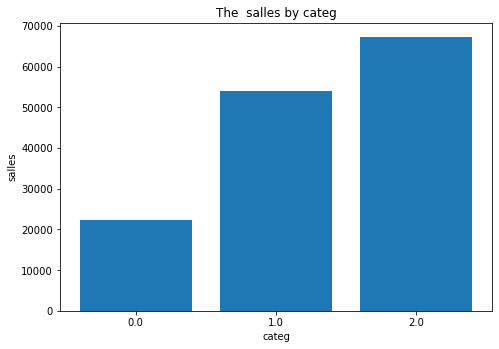

In [113]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
categ = df_salles['categ']
price = df_salles['price']
plt.ylabel('salles')
plt.xlabel('categ')
plt.title('The  salles by categ')
ax.bar(categ,price)
plt.show()

# chifre d'ffre for man for women 


In [114]:
df_pric_ou

,id_prod,price,categ,date,session_id,client_id,sex,birth
134359,1_449,14.99,1.0,2021-03-01,s_55,c_4810,f,1988.0
367938,1_406,24.81,1.0,2021-03-01,s_160,c_4466,m,1960.0
367949,1_376,17.49,1.0,2021-03-01,s_160,c_4466,m,1960.0
314742,1_400,16.60,1.0,2021-03-01,s_239,c_2494,m,2002.0
67859,0_1472,12.49,0.0,2021-03-01,s_391,c_2118,m,1990.0
...,...,...,...,...,...,...,...,...
411439,0_1338,9.28,0.0,2023-02-28,s_348068,c_3286,m,1981.0
476167,1_245,23.99,1.0,2023-02-28,s_348220,c_2974,f,1956.0
476169,0_1560,12.12,0.0,2023-02-28,s_348220,c_2974,f,1956.0
593223,1_441,24.99,1.0,2023-02-28,s_348373,c_5990,f,1996.0


In [115]:
cat_pric = df_pric_ou.groupby(['client_id','sex']).agg({'price': 'sum'})
sex_pric = cat_pric.reset_index('sex')
sex_pric

,sex,price
client_id,,
c_1,m,550.19
c_10,m,1353.60
c_100,m,116.32
c_1000,f,2209.92
c_1001,m,1420.08
...,...,...
c_995,m,189.41
c_996,f,1611.59
c_997,f,1432.02


In [116]:
sex_pric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8591 entries, c_1 to c_999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     8591 non-null   object 
 1   price   8591 non-null   float64
dtypes: float64(1), object(1)
memory usage: 201.4+ KB


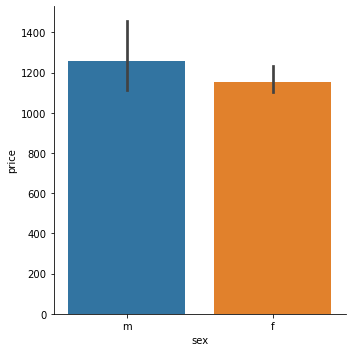

In [117]:
sns.catplot(x="sex", y="price", kind="bar", data=sex_pric)

# moving avarage (determine the direction of a trend )

A moving average is a technical indicator that market analysts and investors may use to determine the direction of a trend. It sums up the data points of a financial security over a specific time period and divides the total by the number of data points to arrive at an average. It is called a “moving” average because it is continually recalculated based on the latest price data.

By calculating the moving average, the impacts of random, short-term fluctuations on the price of a stock over a specified time frame are mitigated.

-notice that i have calculate the mean / moving avarage without the outliers, but i did not remove them

In [118]:
df_pric_ou

,id_prod,price,categ,date,session_id,client_id,sex,birth
134359,1_449,14.99,1.0,2021-03-01,s_55,c_4810,f,1988.0
367938,1_406,24.81,1.0,2021-03-01,s_160,c_4466,m,1960.0
367949,1_376,17.49,1.0,2021-03-01,s_160,c_4466,m,1960.0
314742,1_400,16.60,1.0,2021-03-01,s_239,c_2494,m,2002.0
67859,0_1472,12.49,0.0,2021-03-01,s_391,c_2118,m,1990.0
...,...,...,...,...,...,...,...,...
411439,0_1338,9.28,0.0,2023-02-28,s_348068,c_3286,m,1981.0
476167,1_245,23.99,1.0,2023-02-28,s_348220,c_2974,f,1956.0
476169,0_1560,12.12,0.0,2023-02-28,s_348220,c_2974,f,1956.0
593223,1_441,24.99,1.0,2023-02-28,s_348373,c_5990,f,1996.0


In [119]:
mov = df_pric_ou[['date', 'price']]
mov

,date,price
134359,2021-03-01,14.99
367938,2021-03-01,24.81
367949,2021-03-01,17.49
314742,2021-03-01,16.60
67859,2021-03-01,12.49
...,...,...
411439,2023-02-28,9.28
476167,2023-02-28,23.99
476169,2023-02-28,12.12
593223,2023-02-28,24.99


In [120]:
moveind= mov.set_index('date')
moveind

,price
date,
2021-03-01,14.99
2021-03-01,24.81
2021-03-01,17.49
2021-03-01,16.60
2021-03-01,12.49
...,...
2023-02-28,9.28
2023-02-28,23.99
2023-02-28,12.12


In [121]:
df_2021 = moveind.loc['2021-03-01': '2022-02-01']
df_2021

,price
date,
2021-03-01,14.99
2021-03-01,24.81
2021-03-01,17.49
2021-03-01,16.60
2021-03-01,12.49
...,...
2022-02-01,29.99
2022-02-01,3.55
2022-02-01,6.99


In [122]:
sum_pric_1_2 = df_2021.groupby('date').agg({'price': 'sum'})
sum_pric_1_2.reset_index('date')
pric_av = sum_pric_1_2
pric_av

,price
date,
2021-03-01,14844.41
2021-03-02,14215.72
2021-03-03,13300.09
2021-03-04,13869.68
2021-03-05,14932.68
...,...
2022-01-28,16090.91
2022-01-29,16425.39
2022-01-30,16034.97


# Moving average for  March 2021- february 2022
- long rolling for 100 dayes 



In [123]:
pric_av['moving avarage'] = pric_av.rolling(window= 100).mean()
long_rolling = pric_av
long_rolling

,price,moving avarage
date,,
2021-03-01,14844.41,NaN
2021-03-02,14215.72,NaN
2021-03-03,13300.09,NaN
2021-03-04,13869.68,NaN
2021-03-05,14932.68,NaN
...,...,...
2022-01-28,16090.91,15785.5562
2022-01-29,16425.39,15788.3369
2022-01-30,16034.97,15798.5621


In [125]:
import matplotlib.dates as mdates


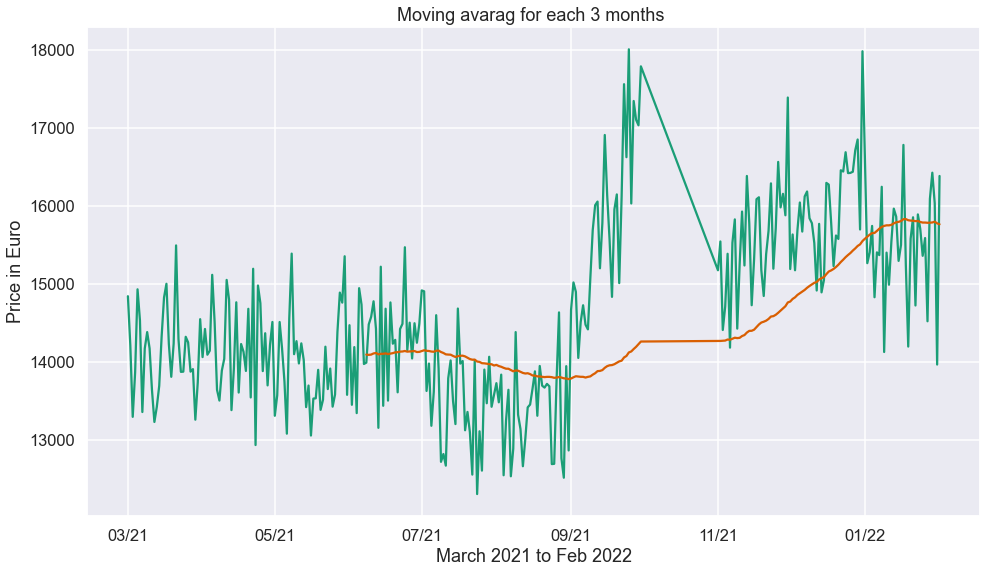

In [126]:
sns.set(style='darkgrid', context='talk', palette='Dark2')

my_year_month_fmt = mdates.DateFormatter('%m/%y')

start_date = '2021-03-01'
end_date = '2022-02-01'

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'price'], label='Price')

ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'moving avarage'], label = '100-days 2022')

ax.set_title('Moving avarag for each 3 months ')
ax.set_ylabel('Price in Euro')
ax.set_xlabel('March 2021 to Feb 2022')
ax.xaxis.set_major_formatter(my_year_month_fmt)

# Moving average From Mrach 2022-   February 2023
- long rolling for 100 dayes 



In [127]:
df_22_23  = moveind.loc['2022-03-01': '2023-02-01']
df_22_23

,price
date,
2022-03-01,17.99
2022-03-01,16.95
2022-03-01,3.99
2022-03-01,9.56
2022-03-01,5.99
...,...
2023-02-01,13.99
2023-02-01,11.25
2023-02-01,13.26


In [128]:
sum_pric2_3 = df_22_23.groupby('date').agg({'price': 'sum'})
sum_pric2_3.reset_index('date')
pric_av23 = sum_pric2_3
pric_av23

,price
date,
2022-03-01,16383.45
2022-03-02,17214.86
2022-03-03,15402.82
2022-03-04,13350.92
2022-03-05,14831.12
...,...
2023-01-28,12763.90
2023-01-29,14069.00
2023-01-30,15355.71


In [129]:
pric_av23['moving avarage'] = pric_av23['price'].rolling(window= 100).mean()
long_rolling_1 = pric_av23
long_rolling_1

,price,moving avarage
date,,
2022-03-01,16383.45,NaN
2022-03-02,17214.86,NaN
2022-03-03,15402.82,NaN
2022-03-04,13350.92,NaN
2022-03-05,14831.12,NaN
...,...,...
2023-01-28,12763.90,14787.5501
2023-01-29,14069.00,14797.2262
2023-01-30,15355.71,14789.5857


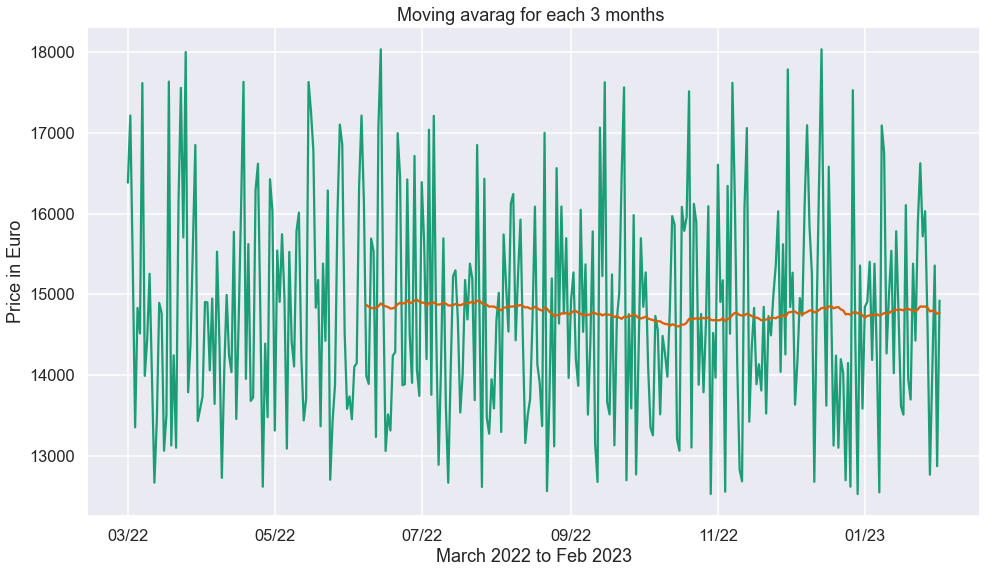

In [130]:
sns.set(style='darkgrid', context='talk', palette='Dark2')

my_year_month_fmt = mdates.DateFormatter('%m/%y')

start_date = '2022-03-01'
end_date = '2023-02-01'

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(pric_av23.loc[start_date:end_date, :].index, pric_av23.loc[start_date:end_date, 'price'], label='Price')

ax.plot(long_rolling_1.loc[start_date:end_date, :].index, long_rolling_1.loc[start_date:end_date, 'moving avarage'], label = '100-days 2022')

ax.set_title('Moving avarag for each 3 months ')
ax.set_ylabel('Price in Euro')
ax.set_xlabel('March 2022 to Feb 2023')
ax.xaxis.set_major_formatter(my_year_month_fmt)

# quelques informations sur les profils de nos clients, et également la répartition du chiffre d'affaires entre eux, via par exemple une courbe de Lorenz.

In [131]:
# question about luranze curve / understanding 
df_pric_ou

,id_prod,price,categ,date,session_id,client_id,sex,birth
134359,1_449,14.99,1.0,2021-03-01,s_55,c_4810,f,1988.0
367938,1_406,24.81,1.0,2021-03-01,s_160,c_4466,m,1960.0
367949,1_376,17.49,1.0,2021-03-01,s_160,c_4466,m,1960.0
314742,1_400,16.60,1.0,2021-03-01,s_239,c_2494,m,2002.0
67859,0_1472,12.49,0.0,2021-03-01,s_391,c_2118,m,1990.0
...,...,...,...,...,...,...,...,...
411439,0_1338,9.28,0.0,2023-02-28,s_348068,c_3286,m,1981.0
476167,1_245,23.99,1.0,2023-02-28,s_348220,c_2974,f,1956.0
476169,0_1560,12.12,0.0,2023-02-28,s_348220,c_2974,f,1956.0
593223,1_441,24.99,1.0,2023-02-28,s_348373,c_5990,f,1996.0


In [132]:
# groupby client_id then lourz

# number of m and f 
clien_pric = df_pric_ou.groupby(['client_id']).agg({'price': 'sum'})
clien_pric

,price
client_id,
c_1,550.19
c_10,1353.60
c_100,116.32
c_1000,2209.92
c_1001,1420.08
...,...
c_995,189.41
c_996,1611.59
c_997,1432.02


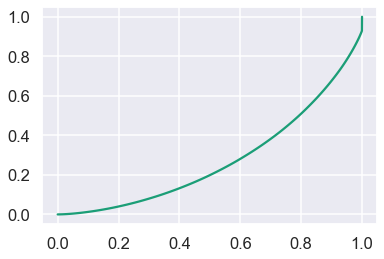

In [133]:

expenses = clien_pric[clien_pric['price']>0]
exp = expenses['price'].values
n = len(exp)
lorenz = np.cumsum(np.sort(exp)) / exp.sum()
lorenz = np.append([0],lorenz) # The Lorenz Curve begins at 0

plt.axes().axis('on')
xaxis = np.linspace(0-1/n,1+1/n,n+1) # There is 1 segment (of size n) for each individual, plus 1 segment at y=0. The first segment starts at 0-1/n and the last one finishes at 1+1/n
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.show()

#graph title 

# section 2 

# le lien entre le genre d’un client et les catégories des livres achetés ;

In [134]:
df_pric_ou

,id_prod,price,categ,date,session_id,client_id,sex,birth
134359,1_449,14.99,1.0,2021-03-01,s_55,c_4810,f,1988.0
367938,1_406,24.81,1.0,2021-03-01,s_160,c_4466,m,1960.0
367949,1_376,17.49,1.0,2021-03-01,s_160,c_4466,m,1960.0
314742,1_400,16.60,1.0,2021-03-01,s_239,c_2494,m,2002.0
67859,0_1472,12.49,0.0,2021-03-01,s_391,c_2118,m,1990.0
...,...,...,...,...,...,...,...,...
411439,0_1338,9.28,0.0,2023-02-28,s_348068,c_3286,m,1981.0
476167,1_245,23.99,1.0,2023-02-28,s_348220,c_2974,f,1956.0
476169,0_1560,12.12,0.0,2023-02-28,s_348220,c_2974,f,1956.0
593223,1_441,24.99,1.0,2023-02-28,s_348373,c_5990,f,1996.0


# the relationship between the categorical features(sex) against the (type of category porduct)

#define H₀ (Null Hypothesis) — that the 2 categorical variables to be compared are independent of each other.
    H₀ (Null Hypothesis) — that the 2 categorical variables to be compared are independent of each other.
    H₁ (Alternate Hypothesis) — that the 2 categorical variables being compared are dependent on each other.

And draw my conclusions based on the following p-value conditions:

    p < 0.05 — this means the two categorical variables are correlated.
    p > 0.05 — this means the two categorical variables are not correlated.

In [135]:
sexcat_ = df_pric_ou[['sex', 'categ']]
sexcat_

,sex,categ
134359,f,1.0
367938,m,1.0
367949,m,1.0
314742,m,1.0
67859,m,0.0
...,...,...
411439,m,0.0
476167,f,1.0
476169,f,0.0
593223,f,1.0


# calculating the x2 values 

- 1-The first step is to create a contingency table: 

- The contingency table displays the frequency distribution of the two categorical columns — sex and category.

In [136]:
cong_table = pd.crosstab(index=sexcat_['categ'], columns=sexcat_['sex'])
cong_table

sex,f,m
categ,,
0.0,196986,199711
1.0,113976,111264
2.0,12619,13802


<AxesSubplot:xlabel='sex', ylabel='categ'>

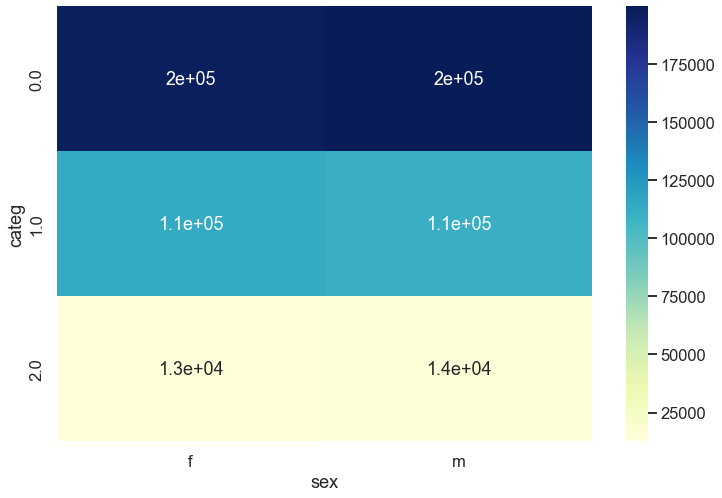

In [137]:
plt.figure(figsize=(12,8))
sns.heatmap(cong_table, annot=True, cmap="YlGnBu")

In [138]:
# corrlation that mean there is a diffrence 


# Calcualte the dgree of freedom
- The Degrees of Freedom is next calculated as (number of rows -1) * (number of columns -1). 
-In this case the degree of freedom is (2–1) * (3–1) = 2  

In [139]:
degree_f = (cong_table.shape[0]-1) * (cong_table.shape[1]-1)
degree_f

2

# Calculate the Observed value 

In [140]:
cong_table.loc['Total', :] = cong_table.sum(axis=0)
cong_table.loc[:,'Total'] = cong_table.sum(axis=1)
df_obsrv = cong_table
print('---Observed (O)---')
display(df_obsrv)

---Observed (O)---


sex,f,m,Total
categ,,,
0.0,196986.0,199711.0,396697.0
1.0,113976.0,111264.0,225240.0
2.0,12619.0,13802.0,26421.0
Total,323581.0,324777.0,648358.0


# Next  I calculate the (Expected values). 


In [141]:
df_exp = cong_table.copy()    
df_exp.iloc[:,:] = np.multiply.outer(
    cong_table.sum(1).values,cong_table.sum().values) / cong_table.sum().sum()
print('---Expected (E)---')
display(df_exp)

---Expected (E)---


sex,f,m,Total
categ,,,
0.0,197982.614477,198714.385523,396697.0
1.0,112412.254403,112827.745597,225240.0
2.0,13186.131120,13234.868880,26421.0
Total,323581.000000,324777.000000,648358.0


# Calculate the chi-square value for each cell using the formula for χ2:
- 2 = ∑(O−E)2/E

In [142]:
df_chi2 = ((df_obsrv - df_exp)**2) / df_exp    
df_chi2.loc[:,'Total']= df_chi2.sum(axis=1)
df_chi2.loc['Total']= df_chi2.sum()
print('---Chi-Square---')
display(df_chi2)

---Chi-Square---


sex,f,m,Total
categ,,,
0.0,5.016806,4.998332,10.015138
1.0,21.752969,21.672863,43.425832
2.0,24.392121,24.302297,48.694418
Total,51.161896,50.973491,102.135388


#    ---get chi-square score--- 
- The chi-square score is the grand total of the chi-square values:

In [143]:
chi_square_score = df_chi2.iloc[:-1,:-1].sum().sum()
chi_square_score

102.13538786663071

- by chaking the chi square table(on interne ): 
- (α )set to be 0.05, with 2 degrees of freedom, then the critical chi-square region is 5.99
- ant therefore the chi_suare 147 is greater thatn 5.99

- the chi_square_score: (147) is greater than 5.99(a = 0.05) it therefore falls in the rejection region, 
and hence the null hypothesis is rejected and the alternate hypothesis is accepted.
H₁ (Alternate Hypothesis) — that the 2 categorical variables being compared are not dependent on each other.

# calculate P-value 
    - p < 0.05 — this means the two categorical variables are correlated.
    - p > 0.05 — this means the two categorical variables are not correlated.

In [144]:
p = stats.distributions.chi2.sf(chi_square_score, degree_f)
print('p-values : ',p,' > 0.05 that mean two categorical variables are not correlated')

p-values :  6.631050284131034e-23  > 0.05 that mean two categorical variables are not correlated


# result of chi_scor a & dgree of freedom & p-value

In [145]:
print('Chi2_score : ', chi_square_score)
print('Degree of freedom : ', degree_f)
print('P-value is :', p)

Chi2_score :  102.13538786663071
Degree of freedom :  2
P-value is : 6.631050284131034e-23


In [146]:
s = stats.chi2_contingency(cong_table)
s

(102.13538786663071,
 8.991852560115784e-20,
 6,
 array([[197982.61447688, 198714.38552312, 396697.        ],
        [112412.25440266, 112827.74559734, 225240.        ],
        [ 13186.13112046,  13234.86887954,  26421.        ],
        [323581.        , 324777.        , 648358.        ]]))

# le lien entre l’âge des clients et le montant total des achats,

 le lien entre l’âgela fréquence d’achat, 
 
 le lien entre l’âge la taille du panier moyen ( the avg price)
 
le lien entre l’âge  les catégories des livres achetés.()

In [147]:
df_pric_ou

,id_prod,price,categ,date,session_id,client_id,sex,birth
134359,1_449,14.99,1.0,2021-03-01,s_55,c_4810,f,1988.0
367938,1_406,24.81,1.0,2021-03-01,s_160,c_4466,m,1960.0
367949,1_376,17.49,1.0,2021-03-01,s_160,c_4466,m,1960.0
314742,1_400,16.60,1.0,2021-03-01,s_239,c_2494,m,2002.0
67859,0_1472,12.49,0.0,2021-03-01,s_391,c_2118,m,1990.0
...,...,...,...,...,...,...,...,...
411439,0_1338,9.28,0.0,2023-02-28,s_348068,c_3286,m,1981.0
476167,1_245,23.99,1.0,2023-02-28,s_348220,c_2974,f,1956.0
476169,0_1560,12.12,0.0,2023-02-28,s_348220,c_2974,f,1956.0
593223,1_441,24.99,1.0,2023-02-28,s_348373,c_5990,f,1996.0


In [148]:
df_pric_ou.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 648358 entries, 134359 to 315139
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     648358 non-null  object        
 1   price       648358 non-null  float64       
 2   categ       648358 non-null  float64       
 3   date        648358 non-null  datetime64[ns]
 4   session_id  648358 non-null  object        
 5   client_id   648358 non-null  object        
 6   sex         648358 non-null  object        
 7   birth       648358 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 44.5+ MB


In [149]:
df_pric_ou['birth'] = df_pric_ou['birth'].astype(int)
df_birth = df_pric_ou
df_birth

/var/folders/60/5b9_rz6d6qn1yvxznrxvrtxm0000gn/T/ipykernel_23285/678245504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pric_ou['birth'] = df_pric_ou['birth'].astype(int)


,id_prod,price,categ,date,session_id,client_id,sex,birth
134359,1_449,14.99,1.0,2021-03-01,s_55,c_4810,f,1988
367938,1_406,24.81,1.0,2021-03-01,s_160,c_4466,m,1960
367949,1_376,17.49,1.0,2021-03-01,s_160,c_4466,m,1960
314742,1_400,16.60,1.0,2021-03-01,s_239,c_2494,m,2002
67859,0_1472,12.49,0.0,2021-03-01,s_391,c_2118,m,1990
...,...,...,...,...,...,...,...,...
411439,0_1338,9.28,0.0,2023-02-28,s_348068,c_3286,m,1981
476167,1_245,23.99,1.0,2023-02-28,s_348220,c_2974,f,1956
476169,0_1560,12.12,0.0,2023-02-28,s_348220,c_2974,f,1956
593223,1_441,24.99,1.0,2023-02-28,s_348373,c_5990,f,1996


# calculate the age from the birth 


In [150]:
year = 2023
birth = df_birth['birth']
df_birth['age'] = year - birth
df_age = df_birth
df_age

/var/folders/60/5b9_rz6d6qn1yvxznrxvrtxm0000gn/T/ipykernel_23285/3124706157.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_birth['age'] = year - birth


,id_prod,price,categ,date,session_id,client_id,sex,birth,age
134359,1_449,14.99,1.0,2021-03-01,s_55,c_4810,f,1988,35
367938,1_406,24.81,1.0,2021-03-01,s_160,c_4466,m,1960,63
367949,1_376,17.49,1.0,2021-03-01,s_160,c_4466,m,1960,63
314742,1_400,16.60,1.0,2021-03-01,s_239,c_2494,m,2002,21
67859,0_1472,12.49,0.0,2021-03-01,s_391,c_2118,m,1990,33
...,...,...,...,...,...,...,...,...,...
411439,0_1338,9.28,0.0,2023-02-28,s_348068,c_3286,m,1981,42
476167,1_245,23.99,1.0,2023-02-28,s_348220,c_2974,f,1956,67
476169,0_1560,12.12,0.0,2023-02-28,s_348220,c_2974,f,1956,67
593223,1_441,24.99,1.0,2023-02-28,s_348373,c_5990,f,1996,27


In [151]:
df_age .info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 648358 entries, 134359 to 315139
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     648358 non-null  object        
 1   price       648358 non-null  float64       
 2   categ       648358 non-null  float64       
 3   date        648358 non-null  datetime64[ns]
 4   session_id  648358 non-null  object        
 5   client_id   648358 non-null  object        
 6   sex         648358 non-null  object        
 7   birth       648358 non-null  int64         
 8   age         648358 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 49.5+ MB


In [152]:
cor_price_age = df_age.groupby('age').agg({'price':'sum'})
cor_price_age

,price
age,
19,403235.71
20,118852.20
21,124844.14
22,114086.79
23,116506.60
...,...
90,5078.98
91,4803.64
92,2691.19


In [153]:
df_pric_age = cor_price_age.reset_index()
df_pric_age

,age,price
0,19,403235.71
1,20,118852.20
2,21,124844.14
3,22,114086.79
4,23,116506.60
...,...,...
71,90,5078.98
72,91,4803.64
73,92,2691.19
74,93,3959.24


# Find the relatinship
- Pearson Correlation Coefficient

|\|r\|| Interpretation|
|-------|---------------|
|0.00 < 0.10| Negligible|
|0.10 < 0.20 |Weak|
|0.20 < 0.40| Moderate|
|0.40 < 0.60| Relatively strong|
|0.60 < 0.80| Strong|
|0.80 <= 1.00| Very strong|

# lien entre l’âge des clients et le montant total des achats

In [154]:
find_corr = df_pric_age.corr()
find_corr

,age,price
age,1.000000,-0.701854
price,-0.701854,1.000000


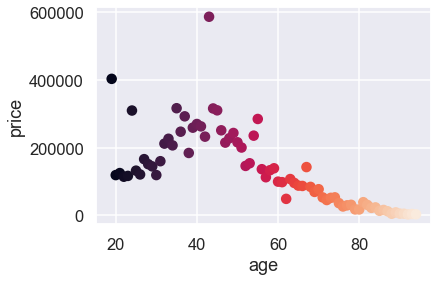

In [155]:

fig, ax = plt.subplots()

ax.scatter(df_pric_age['age'], df_pric_age['price'], c=df_pric_age.index)

ax.set_xlabel("age");

ax.set_ylabel("price");
plt.show()

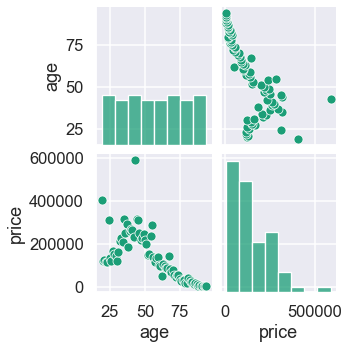

In [156]:
sns.pairplot(df_pric_age)

# le lien entre l’âge et la fréquence d’achat
- Frequency Table: 


- frequancy table is defind as a table showing (1) all of values for a variable in a dataset, and(2) the frequency of each  of those responses , some frequency tables also show a cumulative frequency and proportions of responses. 

In [157]:
myFrqtable = df_age['age'].value_counts()
myFrqtable

43    45558
35    24126
44    23867
45    23795
37    22514
      ...  
91      293
88      260
93      222
94      198
92      164
Name: age, Length: 76, dtype: int64

In [158]:
myKes = myFrqtable.keys()
myKes

Int64Index([43, 35, 44, 45, 37, 40, 41, 39, 46, 36, 49, 42, 55, 48, 33, 47, 50,
            32, 34, 51, 54, 38, 19, 53, 52, 24, 67, 59, 56, 58, 57, 63, 61, 60,
            64, 65, 66, 27, 31, 68, 28, 70, 29, 26, 25, 69, 21, 30, 23, 20, 22,
            74, 73, 71, 62, 72, 81, 75, 78, 82, 77, 76, 84, 83, 80, 79, 86, 85,
            87, 89, 90, 91, 88, 93, 94, 92],
           dtype='int64')

In [159]:
len(myKes)


76

In [160]:
myVal= myFrqtable.values
myVal

array([45558, 24126, 23867, 23795, 22514, 20545, 19820, 19695, 19256,
       18900, 18653, 17741, 17565, 17381, 17318, 16594, 16303, 16028,
       15668, 15231, 14180, 14083, 13327,  9353,  8861,  8724,  8532,
        8434,  8239,  8176,  6789,  6521,  5959,  5932,  5699,  5503,
        5248,  5216,  5181,  5164,  4993,  4808,  4574,  4229,  4199,
        4138,  4055,  4005,  3936,  3823,  3724,  3248,  3208,  3184,
        2897,  2742,  2329,  2179,  1885,  1818,  1777,  1605,  1420,
        1344,  1049,  1040,   923,   815,   745,   536,   314,   293,
         260,   222,   198,   164])

In [161]:
# combin the results into datafram pandas

myFrqTable = pd.DataFrame({'age': myKes, 'Frequency_buying': myVal})
myFrqTable

,age,Frequency_buying
0,43,45558
1,35,24126
2,44,23867
3,45,23795
4,37,22514
...,...,...
71,91,293
72,88,260
73,93,222
74,94,198


# The proportion of age buying

In [162]:
myFrqTable['percent %'] = myFrqTable['Frequency_buying']/ myFrqTable['Frequency_buying'].sum()*100
myFrqTable

,age,Frequency_buying,percent %
0,43,45558,7.026674
1,35,24126,3.721092
2,44,23867,3.681145
3,45,23795,3.670040
4,37,22514,3.472464
...,...,...,...
71,91,293,0.045191
72,88,260,0.040101
73,93,222,0.034240
74,94,198,0.030539


In [163]:
# the minimumn buying by age
min_ = myFrqTable.loc[myFrqTable['Frequency_buying'].idxmin()]
min_

age                  92.000000
Frequency_buying    164.000000
percent %             0.025295
Name: 75, dtype: float64

In [164]:
# the most buying by age 
max_ =  myFrqTable.loc[myFrqTable['Frequency_buying'].idxmax()]
max_

age                    43.000000
Frequency_buying    45558.000000
percent %               7.026674
Name: 0, dtype: float64

# Statistical test 
- Pearson Correlation Coefficient

In [165]:
cor_table = myFrqTable[['age', 'Frequency_buying']]
cor_table

,age,Frequency_buying
0,43,45558
1,35,24126
2,44,23867
3,45,23795
4,37,22514
...,...,...
71,91,293
72,88,260
73,93,222
74,94,198


In [166]:
cor_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               76 non-null     int64
 1   Frequency_buying  76 non-null     int64
dtypes: int64(2)
memory usage: 1.3 KB


In [167]:
corr_ag_frq = cor_table.corr()
corr_ag_frq

,age,Frequency_buying
age,1.00000,-0.51624
Frequency_buying,-0.51624,1.00000


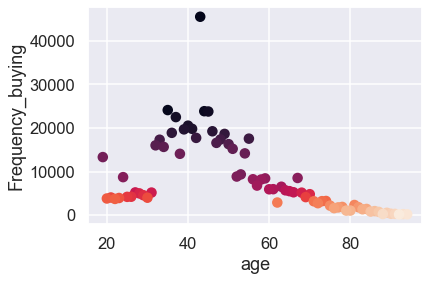

In [168]:
fig, ax = plt.subplots()

ax.scatter(cor_table['age'], cor_table['Frequency_buying'], c=cor_table.index)

ax.set_xlabel("age");

ax.set_ylabel("Frequency_buying");

#  le lien entre l’âge et la taille du panier moyen ( the avg price)
- Pearson Correlation Coefficient

In [169]:
df_birth

,id_prod,price,categ,date,session_id,client_id,sex,birth,age
134359,1_449,14.99,1.0,2021-03-01,s_55,c_4810,f,1988,35
367938,1_406,24.81,1.0,2021-03-01,s_160,c_4466,m,1960,63
367949,1_376,17.49,1.0,2021-03-01,s_160,c_4466,m,1960,63
314742,1_400,16.60,1.0,2021-03-01,s_239,c_2494,m,2002,21
67859,0_1472,12.49,0.0,2021-03-01,s_391,c_2118,m,1990,33
...,...,...,...,...,...,...,...,...,...
411439,0_1338,9.28,0.0,2023-02-28,s_348068,c_3286,m,1981,42
476167,1_245,23.99,1.0,2023-02-28,s_348220,c_2974,f,1956,67
476169,0_1560,12.12,0.0,2023-02-28,s_348220,c_2974,f,1956,67
593223,1_441,24.99,1.0,2023-02-28,s_348373,c_5990,f,1996,27


In [170]:
age_pan_avg = df_birth.groupby('age').agg({'price': 'mean'})
age_pan_avg

,price
age,
19,30.257050
20,31.088726
21,30.787704
22,30.635550
23,29.600254
...,...
90,16.175096
91,16.394676
92,16.409695


In [171]:
age_pan_avg = df_birth.groupby('age').agg({'price': 'mean'})
age_pan_avg

,price
age,
19,30.257050
20,31.088726
21,30.787704
22,30.635550
23,29.600254
...,...
90,16.175096
91,16.394676
92,16.409695


In [172]:
# sum the price and devied by acount 

In [173]:
idx_ag_av_paskt = age_pan_avg.reset_index('age')

idx_ag_av_paskt

,age,price
0,19,30.257050
1,20,31.088726
2,21,30.787704
3,22,30.635550
4,23,29.600254
...,...,...
71,90,16.175096
72,91,16.394676
73,92,16.409695
74,93,17.834414


In [174]:
Age_Avg = idx_ag_av_paskt[['age', 'price']]
Age_Avg

,age,price
0,19,30.257050
1,20,31.088726
2,21,30.787704
3,22,30.635550
4,23,29.600254
...,...,...
71,90,16.175096
72,91,16.394676
73,92,16.409695
74,93,17.834414


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


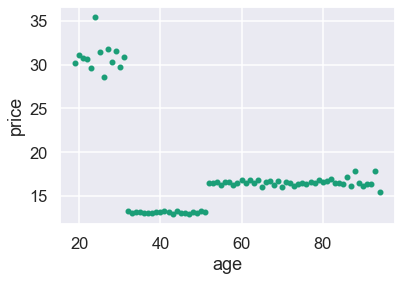

In [175]:
Age_Avg.plot(kind= 'scatter', x = 'age', y = 'price')
plt.show()

<AxesSubplot:>

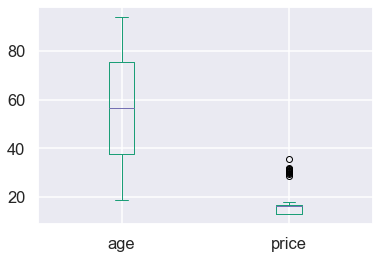

In [176]:
Age_Avg.plot(kind= 'box')

In [177]:
# Corelation Coefficients
Age_Avg.corr()

,age,price
age,1.000000,-0.480435
price,-0.480435,1.000000


#  Le lien entre l’âge et les catégories des livres achetés

- age and categ

- one way ANOVA:the analysis variance 
- the one way ANOVA tests whethere the mean of some numeric variable differs across the levels of one categroical variable
- it sessentially answers the question do any of the group means differ from one another?
- first going thtough several calculation to arrive at a test statistic and then compare the test statistic to a critical value based on probability distribution . in the case of ANOVA we use (f-distribution)

In [178]:
age_categ = df_age[['age', 'categ']]
age_categ

,age,categ
134359,35,1.0
367938,63,1.0
367949,63,1.0
314742,21,1.0
67859,33,0.0
...,...,...
411439,42,0.0
476167,67,1.0
476169,67,0.0
593223,27,1.0


In [179]:
df_sort = age_categ.sort_values("age")
df_sort

,age,categ
632017,19,2.0
566147,19,2.0
325679,19,1.0
148594,19,1.0
660161,19,0.0
...,...,...
335301,94,0.0
335290,94,0.0
335323,94,1.0
335331,94,1.0


In [180]:
df_sort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 648358 entries, 632017 to 335295
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   age     648358 non-null  int64  
 1   categ   648358 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 14.8 MB


In [181]:
df_sort['categ'] = df_sort['categ'].astype(int)
df_sort1 = df_sort
df_sort1

,age,categ
632017,19,2
566147,19,2
325679,19,1
148594,19,1
660161,19,0
...,...,...
335301,94,0
335290,94,0
335323,94,1
335331,94,1


In [182]:
df_sort1['categ'].unique()

array([2, 1, 0])

In [183]:
df_sort1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 648358 entries, 632017 to 335295
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   age     648358 non-null  int64
 1   categ   648358 non-null  int64
dtypes: int64(2)
memory usage: 14.8 MB


# ploting data using boxplot

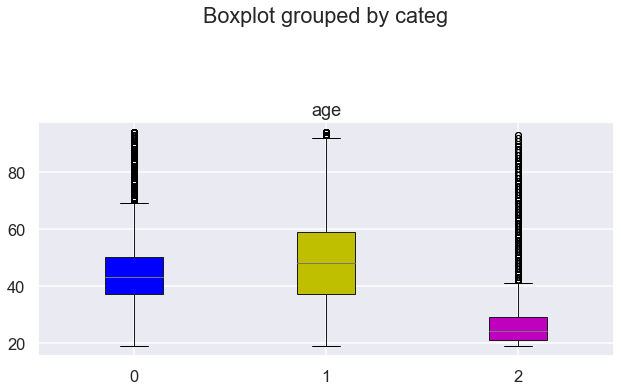

In [184]:
bp_dict= df_sort1.boxplot('age', by = 'categ',
                         layout=(4,1),figsize=(10,20),
                          return_type='both',
                          patch_artist = True,)


colors = ['b', 'y', 'm', 'c', 'g', 'b', 'r', 'k', ]
for row_key, (ax,row) in bp_dict.iteritems():
    ax.set_xlabel('')
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(colors[i])

- The scipy library has a function for carrying out one-way ANOVA tests called scipy.stats.f_oneway(). 
- I use the ANOVA to compare average ages across the groups:




In [185]:
grps = pd.unique(df_sort1.categ.values)
d_data = {grp : df_sort1['age'][df_sort1.categ== grp] for grp in grps }
k = len(pd.unique(df_sort1.categ)) 
N = len(df_sort1.values)
m = df_sort1.groupby('categ').size()[0]

In [186]:
# one-way ANOVA using Scipy
f, p = stats.f_oneway(d_data[0],d_data[1], d_data[2] )

In [187]:
f, p

(35658.09771547029, 0.0)

# anothere way 

In [188]:
model = ols('age ~ categ',
           data = df_sort1).fit()
anova_result = sm.stats.anova_lm(model, typ= 2)
print(anova_result)

                sum_sq        df            F  PR(>F)
categ     3.522756e+05       1.0  1940.382861     0.0
Residual  1.177087e+08  648356.0          NaN     NaN


In [189]:
# proforming anova 
anovg = sm.stats.anova_lm(model, type = 2)
anovg

,df,sum_sq,mean_sq,F,PR(>F)
categ,1.0,3.522756e+05,352275.613760,1940.382861,0.0
Residual,648356.0,1.177087e+08,181.549539,NaN,NaN


#  -   End  - 

# Drift  notice and code

- each time define the null hypothesis (H0) and alternative hypothesis (Ha) to use any stats test.


- Asking my yourself, why are you testing something.. this is where the hypothesis comes in

 
- Simple linear regression describes the linear relationship between a response variable (denoted by y) and an explanatory variable (denoted by x) using a statistical model, and this model can be used to make predictions. Pearson correlation is a number ranging from -1 to 1 that represents the strength of the linear relationship between two numeric variables. A value of 1 corresponds to a perfect positive linear relationship, a value of 0 to no linear relationship, and a value of -1 to a perfect negative relationship.

- Simply both describe relationship, but regression is parameter of "how" one relates to the other correlation is the degree of relationship

- Statistical hypothesis tests are based a statement called the null hypothesis that assumes nothing interesting is going on between whatever variables you are testing. The exact form of the null hypothesis varies from one type test to another: if you are testing whether groups differ, the null hypothesis states that the groups are the same. For instance, if you wanted to test whether the average age of voters in your home state differs from the national average, the null hypothesis would be that there is no difference between the average ages.

- The purpose of a hypothesis test is to determine whether the null hypothesis is likely to be true given sample data. If there is little evidence against the null hypothesis given the data, you accept the null hypothesis. If the null hypothesis is unlikely given the data, you might reject the null in favor of the alternative hypothesis: that something interesting is going on. The exact form of the alternative hypothesis will depend on the specific test you are carrying out. Continuing with the example above, the alternative hypothesis would be that the average age of voters in your state does in fact differ from the national average.

- Once you have the null and alternative hypothesis in hand, you choose a significance level (often denoted by the Greek letter α.). The significance level is a probability threshold that determines when you reject the null hypothesis. After carrying out a test, if the probability of getting a result as extreme as the one you observe due to chance is lower than the significance level, you reject the null hypothesis in favor of the alternative. This probability of seeing a result as extreme or more extreme than the one observed is known as the p-value.


- important to discriptive stat for cleaning and explot the data and give you ideas about data , and it is a pare of data cleaning 

In [190]:
# summery for each steps 
# what we find in this data
# what we find : what is the first thing the we notice : 
# what didi we do after we notice 

    # not and what we do for each steps
    # month of october there were missing data 
    #becuse we are going to do a comprission analysis so we excloud the oct
    # explatin the problem that you have and then what you did 
    # we have this
    
    #second part : 
    # try to invistigate
    # 20 minit 
